### Analysis of mobility data 

Here we analyze **global** mobility patterns. For this we first plot some general features on a map.
We analyze global mobility data (air planes) Open mobility data (accessed June 2019) https://bluehub.jrc.ec.europa.eu/migration/app/index.html?state=5cc845a97758cd17cdecd1fb

Some other interesting data sources on bicycle network growth are 
https://github.com/nateraluis/bicycle-network-growth/blob/master/02_BicycleAlgorithms.ipynb 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
#import networkx as nx
#import cartopy.crs as ccrs

import geopandas as gpd
#from descartes import PolygonPatch

print('reading data from xlsx files global mobility')
data_gl = pd.read_excel('Global_Transnational_Mobility_dataset_v1_0.xlsx')
print('accessing the data')

data_gl.target_name.iloc[1]
print('analyzing the data from Global mobility')
print('plotting number of incoming flights per country as function of time (year)')
ind_data_in =data_gl.loc[data_gl['target_name'] == 'India']
type(ind_data_in)

ind_data_in.source_name.iloc[12]
print('calculating properties of new dataframe')

len(ind_data_in.shape)

reading data from xlsx files global mobility
accessing the data
analyzing the data from Global mobility
plotting number of incoming flights per country as function of time (year)
calculating properties of new dataframe


2

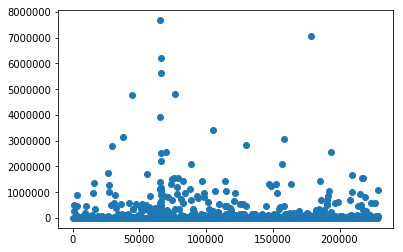

In [23]:
plt.plot(ind_data_in.estimated_trips, 'o')

In [25]:
ind_data_in.estimated_trips

539           229.0
822        256595.0
1101       482618.0
2359         3728.0
2797        98604.0
2837          439.0
2911            7.0
3295          988.0
3413         1326.0
3546          219.0
3573       482228.0
3610         8424.0
3636       890920.0
3637         7466.0
3814          232.0
3817        21027.0
3942         8173.0
4121         1151.0
4674        20446.0
5790         2987.0
5851        21600.0
5911        15873.0
6007          762.0
6191           62.0
6636         1495.0
6770         1210.0
7149         7121.0
7387        12112.0
7488         3467.0
7737           74.0
            ...    
221853      15694.0
222094        654.0
222104       5246.0
222282       5046.0
222528      16431.0
222850      96055.0
222868      30962.0
223207      12010.0
223270     565516.0
223622       1207.0
223897      45407.0
224065       8757.0
224538       1029.0
224676       3615.0
225216       3282.0
226147       4858.0
226258       1001.0
226507       1359.0
226872     569065.0


In [ ]:

ind_data_sort = ind_data_in.sort_values('year')



In [ ]:
plt.plot(ind_data_sort.estimated_trips.values, 'o')

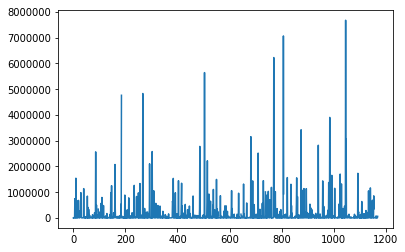

In [33]:
plt.plot(ind_data_sort.estimated_trips.values)

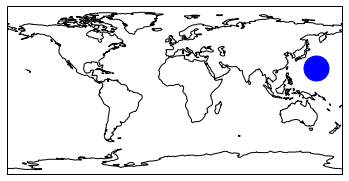

In [7]:
'''
Let us plot the color of each country according to total number of flights in year 2013

For this we first plot basemap
'''
import geopandas as gpd
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from collections import OrderedDict
import networkx as nx
from descartes import PolygonPatch

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ll_to_pixel = ccrs.Geodetic()._as_mpl_transform(ax)

# We need to call draw to ensure that the axes location has been defined
# fully. 
plt.draw()


# Now lets figure out the pixel coordinate of the city.
x1_pix, y1_pix = ll_to_pixel.transform_point([151.2111, -33.8600])
x2_pix, y2_pix = ll_to_pixel.transform_point([101.2111, -33.8600])

# We can even plot these pixel coordinates directly with matplotlib.
plt.plot(x1_pix, y1_pix, 'ob', markersize=25, transform=None)
plt.plot(x2_pix, y2_pix, 'ob', markersize=25, transform=None)

#plt.savefig('figure_1.png', dpi=plt.gcf().get_dpi())
plt.show()

We plot some usual properties using world geopandas module.

To read more about this amazing cartopy feature go to 
https://geopandas.readthedocs.io/en/latest/mapping.html


In [ ]:


fig, ax = plt.subplots(1, 1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print('printing properties with world geopandas ')
#plot those GeoDataFrames
print(world.head())


print('ploting cities ')
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head() 
#plot world map 
world.plot()

'''
# Plot population estimates with an accurate legend
'''

#fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)

country_names = world[['name', 'iso_a3']]
#we use underlying base map 
base = world.plot(color='white', edgecolor='black')

#we plot all cities on a basemap
cities.plot(ax=base, marker='o', color='red', markersize=5);
plt.show()


reading data from xlsx files global mobility
accessing the data
   source_name               target_name source_iso3 target_iso3  year  \
0  Afghanistan                    Rwanda         AFG         RWA  2014   
1        Benin                    Angola         BEN         AGO  2014   
2      Ireland  Turks and Caicos Islands         IRL         TCA  2011   
3      Georgia                     Tonga         GEO         TON  2013   
4        Ghana       Trinidad and Tobago         GHA         TTO  2016   

   estimated_trips       dist source_region target_region    source_subregion  \
0             29.0   5755.222          Asia        Africa       Southern Asia   
1            589.0   2071.837        Africa        Africa  Sub-Saharan Africa   
2            163.0   6459.006        Europe      Americas     Northern Europe   
3              0.0  15651.360          Asia       Oceania        Western Asia   
4            275.0   6765.163        Africa      Americas  Sub-Saharan Africa   

    

MDV 0.0
IRL 391.0
SDN 158.0
LBR 33.0
MNG 5.0
MOZ 4268.0
HKG 69437.0
AUT 48.0
ALB 2536.0
FRA 12716877.0
ITA 106676.0
HKG 8594.0
GAB 2173.0
MLT 25562.0
AZE 4865.0
GIN 390.0
GMB 52.0
SLB 3.0
THA 234203.0
AZE 1760.0
LCA nan
TCA 6.0
DMA nan
LUX 74.0
BRA 136604.0
ALB 84.0
BDI nan
MEX 895.0
ISR 8656.0
TGO 13.0
ARE 162214.0
MLT 4.0
LKA 468.0
GUY 84.0
LTU 0.0
KWT 2864.0
TZA 26020.0
LVA 6.0
DMA 86.0
DNK 12893.0
PNG 296.0
SVN 27349.0
GHA nan
AGO 3282.0
MOZ 783.0
MNG 3061.0
BOL 8.0
TLS nan
TKM 0.0
RUS 1296624.0
PLW nan
BFA 50.0
ZAF nan
MUS 41448.0
GIB 0.0
IND 570759.0
CAF 74.0
MLT 62721.0
PAK 2277.0
LKA 22.0
KWT 96.0
MWI 108.0
POL 266207.0
GBR 135.0
BLZ 63.0
BRN 11.0
NPL 1.0
ISL 109072.0
VNM 674.0
ISR 9144.0
GIB nan
KGZ 0.0
PHL 10911.0
EGY 237.0
CIV 336.0
SOM 1578.0
IDN 323.0
GNB 1.0
ERI 5.0
MWI 159.0
VUT 20.0
DEU 3253.0
TUR 288.0
GAB 53.0
PRK 3.0
STP nan
PNG 0.0
AND nan
LSO 2561.0
PAN 14752.0
LUX 17612.0
BLZ 3.0
CHE 199394.0
TUN 792.0
MHL nan
GIB nan
VGB nan
SOM 9.0
AFG 20.0
IDN 34771.0
CMR 1188.

CAF 14.0
COM 0.0
JOR 17416.0
MNG 0.0
MYS 1026.0
OMN 373.0
PRK nan
KWT 1559.0
TLS nan
TLS nan
NAM 339.0
KWT 444.0
TLS nan
CRI 89753.0
MDA 0.0
AZE nan
MDV 320.0
PAN 450701.0
SLB 3.0
COM 2.0
MWI 13706.0
FJI 26.0
TJK 0.0
KAZ 3.0
BHS 1312.0
GUY 582.0
GRC 190.0
BGR 2087.0
KEN 68.0
LBR 14.0
GEO 20561.0
FIN 1521.0
IRN 24.0
BLZ 0.0
BFA nan
BGD 75.0
MEX 6.0
MAC 71163.0
DEU 99950.0
GEO 5.0
KOR 191.0
NPL 13.0
LKA 277.0
CHL 2.0
COD 7.0
TKM 109.0
FIN 3090.0
KGZ 0.0
SMR nan
ZAF 52172.0
KAZ 3.0
HKG 0.0
SDN 1.0
ERI 2.0
LSO 0.0
GEO 217.0
TZA 4928.0
LBR 6.0
FIN 2664.0
COD 0.0
CAF 4026.0
BGD 1.0
HRV 11727.0
CMR 2.0
EST 3.0
SVK 0.0
TCD 5693.0
SWE 3139.0
NPL 1265.0
GMB nan
AFG nan
BGR 1.0
TUV 1.0
AND nan
GHA 794.0
SWZ nan
IRN nan
DJI 12.0
CMR 10730.0
UZB 0.0
DZA 13.0
NGA 70.0
DJI nan
FJI 409.0
MRT 1426.0
PER 113.0
CMR 10.0
LTU 4.0
CUB 487.0
HKG 1026.0
ITA 208.0
UZB nan
SYC 0.0
NER 111.0
NRU nan
MDG 0.0
CHN 1240261.0
GEO 5.0
CYP 6.0
SDN 2019.0
TTO 600.0
KGZ 80253.0
GIB 12.0
PRT 16.0
VUT 0.0
UKR 1301034.0
NLD

CYP 755.0
PHL 4256.0
UKR 12657.0
VNM 103.0
ETH 1485.0
VUT 0.0
KNA 21.0
ISR 43221.0
KWT 742.0
STP 30.0
SLV 0.0
EST 130.0
BOL 213.0
OMN 1.0
FIN 493.0
IRL 619.0
HUN 989879.0
NOR nan
SWZ 29.0
HUN 10283.0
DJI 390.0
BLR 58021.0
MNG 10.0
FRA 31925.0
SVK 3920.0
ALB 564.0
BEN 1.0
CHN 35636.0
LCA 22.0
DJI 157.0
MNG 3617.0
LAO 102.0
ESP 10.0
MNG 0.0
TUR 1890.0
TTO 19.0
NAM 561.0
GEO 10538.0
SUR 1.0
NOR 9715.0
BEN 0.0
GEO 33076.0
UZB 417.0
SGP 102.0
SDN nan
VEN 2225.0
SEN 517.0
GRC 171.0
TLS nan
ESP 229212.0
MHL nan
BGR 389105.0
SWE 1199.0
PRY 12.0
GUY 7.0
PRK 8.0
KGZ 323.0
NER 32.0
MNG 10746.0
SOM nan
SAU 9250.0
WSM 7.0
BIH 2158.0
ATG 7555.0
MLI 25.0
TON nan
DJI 0.0
SMR nan
ISR 4.0
ROU 62747.0
AUT 85.0
SDN 3016.0
HUN 1522.0
NPL 5.0
MRT 1128.0
ERI 1.0
TON 8.0
KEN 7821.0
COM 1.0
FRA 17176.0
PAK 1561.0
DNK 745.0
PNG 101.0
BGR 213658.0
JPN 744292.0
PHL 4230.0
NZL 43.0
CZE 34462.0
HKG 13353.0
QAT 9.0
COD 1472.0
ZMB nan
IRN 1741.0
BTN nan
GRC 7436.0
VNM 33253.0
CPV 45.0
DJI 150.0
GEO 295.0
CIV 54.0
MLT

BWA 48.0
HUN 26.0
SGP 110.0
NGA 2092.0
EST 3.0
WSM 0.0
RUS 10001.0
MDA 173.0
KAZ 1.0
LVA 62.0
TJK 11.0
BGD 35.0
TKM nan
PER 121.0
KGZ 0.0
MDG 4.0
IRQ 24.0
COG 2760.0
CHE 1915.0
BOL 179385.0
EST 117.0
CRI 4986.0
GIN 0.0
BFA 101.0
SGP 15293.0
LUX 134.0
TCA 0.0
UZB 983.0
NRU nan
MAR 815.0
GMB 1.0
EGY nan
HRV 51.0
TTO 0.0
SWZ 0.0
SVK 0.0
CZE 532737.0
TUV 4.0
TLS nan
BTN nan
ZWE 349.0
PNG 27.0
TUV 0.0
JPN 14299.0
SAU 465.0
FIN 118929.0
GRC 157948.0
SWZ 36.0
TUR 96.0
TUV nan
ALB 0.0
KGZ 340.0
ESP 801.0
ZWE 230.0
TGO 140.0
IND 4298.0
VUT nan
KNA nan
HRV 79.0
NAM 66.0
SEN 16.0
ETH 156.0
ALB 14.0
AUS 10.0
LBY 1.0
KGZ nan
DEU 249455.0
CYP 689.0
DNK 1484.0
EST 38.0
STP 1.0
BEN nan
POL 946021.0
COG 12.0
ECU 95.0
HND 29.0
HND nan
KIR nan
ZAF 30375.0
SGP 4430.0
AND nan
KIR nan
AZE 1.0
GNB nan
NZL 427.0
GEO 12.0
IRN 1.0
ZAF 1279.0
ERI 1.0
THA 202.0
SUR 26.0
SLV 9.0
GMB 5.0
NGA 5700.0
JPN 8.0
ERI 42.0
KHM 14.0
CAN 77842.0
PRY 47.0
ITA 989879.0
GTM 40.0
ISR 7051.0
CAF nan
VCT 0.0
FIN 2259.0
SAU 7.0
CUB

COM 5.0
LBN 273.0
TKM 626.0
BFA nan
DZA 23.0
BTN 3.0
AUS 45966.0
ERI nan
BHS 240.0
PAK 9604.0
AGO nan
BLZ 159.0
GNB 0.0
AND nan
MDA 1865.0
CUB 76.0
EST nan
IND 14.0
EGY 389.0
FJI 14.0
NER 0.0
MMR 4873.0
TUV nan
BWA 0.0
CMR 636.0
BRA 3175.0
FSM 7.0
JAM 12.0
BWA 420.0
IND 542.0
SOM 2.0
MRT 28.0
NIC nan
SLB 22.0
VCT 1.0
ZWE 172.0
PRT 6.0
LCA 29990.0
HND 0.0
STP 0.0
ATG 27006.0
GNQ nan
LSO 14.0
NLD 675.0
PRT nan
NIU nan
BGR 951.0
CYM 888.0
BOL 0.0
SDN 251.0
TCD 38.0
DOM 4.0
SVK nan
PAK 1787.0
KIR nan
LVA 55.0
JAM 6.0
BRN nan
GIN nan
BRB 4.0
MLT 138.0
ZMB 0.0
SYR 0.0
TTO 138.0
PAN 1.0
CYP 6.0
POL 950646.0
TJK 1.0
TTO 2.0
UKR 1387.0
KOR 108.0
VGB nan
BEL 3507.0
CYM 60.0
NGA 1395.0
MHL nan
NRU nan
LUX 48.0
IDN 22.0
BGR 6.0
LBY 395.0
GTM 913.0
MLT 88146.0
JAM 2283.0
TGO 5542.0
BRA 70270.0
IRQ 11931.0
SOM 3.0
EGY 274.0
DNK 2290.0
ISL 6.0
KIR nan
YEM 1036.0
VCT 0.0
GBR 145842.0
NLD 332.0
DZA 1643.0
CYP 20052.0
MOZ 6.0
COL 3218.0
CPV nan
ATG 0.0
STP 0.0
ISR 62.0
LBN 7359.0
BDI 112.0
AND nan
CAN 3

SDN 96.0
TUV 4.0
BRN 16436.0
SGP 126559.0
UKR 48.0
UKR 7142.0
DNK 2.0
NZL 24603.0
RWA 1633.0
SYC 8.0
GIB 45.0
BIH 12.0
HND 51.0
PRT 55450.0
KAZ 7.0
ESP 65221.0
QAT 600.0
TKM 78.0
GNB 0.0
CMR 17166.0
USA 1111547.0
FIN 40220.0
BDI 8524.0
ARE 13173.0
GTM 0.0
NIC 31.0
KHM 44.0
PLW nan
MNG 2843.0
THA 123888.0
CHE 174043.0
ZWE 22091.0
POL 3628.0
AUT 126.0
SDN 2556.0
HND 6124.0
GMB 34.0
NOR 82695.0
MLT 4.0
PER 9.0
AUT nan
BHR 7020.0
KHM 36.0
PHL 1084.0
LTU 1079.0
SEN 789.0
NOR 828.0
RWA 478.0
KGZ 0.0
SDN 417.0
AFG 26.0
MNG 61.0
TON 2.0
MHL 9.0
GNQ 159.0
OMN 2.0
DJI 38.0
CHN 1038.0
HTI 226.0
KIR nan
BGR 2635354.0
FJI 471228.0
IRL 254.0
COG 6.0
DNK 384.0
FSM nan
LAO 77.0
MKD 3.0
CIV 3.0
PER 2.0
TUV 0.0
CYM 1850.0
BDI 57.0
DOM 2.0
JOR 1361.0
DOM 1954.0
NIU 3.0
NAM 74.0
NER 17.0
BHS 26958.0
PSE 2418.0
RWA 2.0
PNG 0.0
LAO 46934.0
LBR 274.0
SLV 15.0
PAN 27.0
BEL 28640.0
DMA 39745.0
ECU 1087.0
BOL 4.0
ETH 0.0
PAN 51211.0
SWZ 0.0
GEO 23887.0
LKA 3892.0
SAU 1452.0
BFA 2009.0
TCA 11.0
EGY 25235.0
BGR 1

TLS nan
GIN nan
KHM 1.0
MKD nan
BEN nan
NIU nan
HKG 1.0
CAF 230.0
KAZ 724.0
MLT 37.0
CRI 6.0
LBY 7.0
NZL 3.0
BFA 16.0
VEN 1.0
MRT 983.0
AUT nan
MNG 0.0
GRC 630.0
AUS 326.0
PNG nan
IRL 598.0
IRQ 4167.0
ZWE 353.0
TCD 149.0
NRU nan
LBN 77911.0
VNM 4.0
BHS 2483.0
CYP nan
DEU nan
MDV nan
JPN nan
ZAF 112620.0
GMB nan
DJI nan
ARG 74.0
NAM 5.0
MDV 55.0
LTU nan
ERI 0.0
ESP 6760827.0
KHM 32.0
SGP 46287.0
MYS 545.0
NPL 647.0
EGY 340.0
JPN 27179.0
ZMB 11.0
PER 162.0
NPL 3765.0
RUS nan
TTO 4552.0
STP nan
MRT 101.0
GNB nan
LBR 4255.0
BMU 1798.0
TLS nan
MOZ nan
NOR 13.0
MHL nan
BHS 2972.0
NZL 2606.0
ROU 6105.0
HUN 5.0
BLR 38.0
NER 965.0
TCA 67.0
NIU nan
KEN 70303.0
GNB 28.0
GEO nan
RWA nan
NIC 869.0
GMB 458.0
DEU 11917.0
LBN 9.0
IND 7591.0
GRC 89.0
ARG 64.0
ROU 16558.0
GNQ 1415.0
MAC 129.0
MAR 2075.0
AUS 710.0
IDN 128022.0
LVA 26.0
SEN 24296.0
COM 307.0
TTO 189.0
NAM 329.0
ECU 479.0
ATG nan
BEL 554.0
MWI 6.0
SYR 0.0
COG 1053.0
GUY 0.0
VNM nan
GIB 1792.0
TUV nan
GHA 1940.0
AUT 1785.0
KEN 0.0
KWT 8908.

MYS 645.0
MDG 2.0
SEN 1.0
GEO 17538.0
DNK 129.0
SUR 10.0
MMR nan
ALB 9727.0
GRC 286.0
TON nan
GNB 15.0
YEM 26.0
CMR 29.0
NOR 30.0
TKM 378.0
BGR 26.0
CAF 5.0
ITA 71933.0
BWA 0.0
HUN 1069174.0
PNG 59.0
LBR 130.0
ZAF 13063.0
VNM 718.0
MDV 938.0
KOR 35351.0
ERI 11.0
ITA 608514.0
PAN 4726.0
ZWE 1449.0
LKA 1.0
TUN nan
CYP 422.0
TCA 4.0
ZAF 70.0
LBR 0.0
TON 1.0
COG nan
SAU 411.0
CIV 129.0
PRT 1825.0
UZB 1.0
NAM 0.0
MDA 288.0
IRQ 440.0
BWA 3.0
ISR 661649.0
TUV nan
HTI 3.0
GUY 27.0
VUT 1.0
NIU 7.0
YEM 10.0
KNA 0.0
HRV 76767.0
YEM 5121.0
CYP 1405387.0
CPV 110.0
CYP 146.0
MDV 2292.0
CHE 56416.0
TCA nan
PHL 43.0
MEX 10691.0
CRI 256.0
BEL 113348.0
IRQ 188.0
DNK 1974020.0
IND nan
YEM 1.0
PLW 1336.0
SMR nan
SYC 1.0
TON 0.0
SMR nan
GRC 109.0
MUS 1295.0
BLR 328.0
QAT 14681.0
FJI 1.0
AFG 0.0
VCT nan
MYS 61.0
TJK 1056.0
FIN 1207.0
MHL nan
STP nan
SLE nan
GNB 7.0
AUT 23.0
LKA 10794.0
GTM 360068.0
FRA 12.0
PRY 30.0
MUS 4.0
PAK 16.0
VCT 6.0
VGB 1156.0
ZAF 0.0
BIH 0.0
MDA 325.0
ERI 39.0
BMU 145.0
AFG 1405.0


FSM 27.0
MNG 14.0
SWZ 32.0
WSM nan
TTO 342.0
ERI 0.0
ZAF 449.0
TUV 0.0
MAC 2.0
PRK 7.0
ISR 17.0
BDI 24.0
CYP 259.0
LBN 72475.0
PSE nan
TZA 2797.0
ERI 4296.0
KEN 15.0
LAO 0.0
NZL 94676.0
ETH 20789.0
SGP 29054.0
SEN 24.0
TUR 67022.0
BFA nan
UZB 88.0
CIV 31.0
KWT 12356.0
BGR 19.0
PSE nan
UZB 5.0
RUS 1390097.0
ESP 17520.0
KWT 0.0
UGA 111.0
SMR nan
NAM nan
USA 342704.0
ALB 0.0
CUB 0.0
FIN 95137.0
BFA 461.0
CAN 157948.0
GEO 205.0
TUR 41685.0
UGA 10.0
UGA 55.0
CHN 47325.0
MDA 51.0
ESP 57.0
TZA 55.0
NZL 251.0
ROU 285.0
MHL 19.0
VGB 0.0
LVA 14707.0
LKA nan
PLW 0.0
LBY 3.0
EST 1194.0
IND 1013.0
THA 87.0
SWE 50832.0
SYC 16.0
TUV nan
CAN 80368.0
NOR 10044.0
RUS 4630143.0
URY 39.0
IDN 56.0
HTI 10.0
ZMB 528.0
TTO 758.0
BEL 11694.0
ARG 44234.0
PSE nan
GNQ 62.0
BFA 122.0
KAZ 2670.0
ALB 13996.0
GTM 1.0
CPV 2.0
SLV nan
MLT 6.0
CAN 40350.0
NAM 11460.0
HTI 776.0
BLR 9993.0
TUV 5.0
ITA 120.0
LBR 0.0
FJI 71.0
SMR nan
HND 1.0
MMR 49904.0
TZA 1976.0
GBR 547340.0
CHN 37926.0
LBR 146.0
GTM 25.0
THA 135.0
DEU 79

MEX 1002.0
CUB 9144.0
UZB 2.0
ISR 54927.0
ETH 3151.0
AFG 0.0
GNB 4.0
VEN nan
SOM 9.0
COD 2.0
MKD 72.0
CHE 226.0
LBR 275.0
MNG 51.0
KNA 22.0
ESP 5.0
KHM 1733.0
AND nan
HTI 103.0
CAF 4.0
ZWE 300.0
MMR 452235.0
BGR 634.0
VEN 393.0
KAZ 1486.0
TLS nan
VGB nan
GNQ 13.0
WSM 2.0
COD 1363.0
HND 1727.0
VUT 10.0
VNM 172840.0
TKM 9.0
AZE 3.0
VGB 9.0
HND nan
LUX 0.0
TTO 7110.0
GAB 3.0
ATG 15.0
GNQ 16.0
TCD 1.0
GAB 0.0
SLV 92.0
GEO 3.0
PSE nan
KHM 19.0
SGP 1055119.0
BDI nan
OMN 242.0
SVN 41.0
UGA 3122.0
TON 8.0
GBR 181733.0
MLT 10.0
ROU 286.0
ARG 4.0
MDV 68.0
NGA 304.0
CZE 62552.0
IRQ 542.0
PSE nan
BTN 287.0
KAZ 4.0
DMA 232.0
ARE 4593.0
ROU 179322.0
NGA 4097.0
PRT 70395.0
HKG 101049.0
BEL nan
LKA 31.0
EGY 1861.0
LUX 72.0
KOR 146.0
KIR 2.0
ARM 0.0
TKM 156.0
COD 5016.0
ERI 0.0
EST 68676.0
VEN 4184.0
MMR 1461.0
BWA 1274.0
CHE 6493.0
GHA 30779.0
YEM 20.0
SLB 51.0
BIH 302.0
UKR 8050.0
CHN 1512760.0
PAK 178.0
FJI 2146.0
CIV 1.0
TKM nan
HND 13.0
MRT 60.0
VUT 0.0
MRT 5.0
ZMB 0.0
MYS 4.0
OMN 48.0
NAM 77531.0

IRN 146.0
AZE 7168.0
AFG 51.0
GUY 0.0
AGO 1339.0
SLE 104.0
TON 3.0
UZB 37497.0
GNB 0.0
PHL 427.0
OMN 1.0
NRU nan
BMU 305.0
LBR 53.0
SDN 166.0
STP 7.0
DZA 1040.0
IDN 710.0
BGR 564.0
HND 0.0
SOM 232.0
HKG 731.0
GEO 25.0
SOM 0.0
ARE 32171.0
CPV 20.0
SLB nan
MAR 12001.0
FIN 154823.0
ISR 5.0
LUX 4951.0
CAF 2.0
GHA 771.0
NAM 1.0
CYM 49.0
TUR 3072.0
BRN 104.0
PRT 85.0
MHL 1.0
VUT 3.0
OMN 216.0
CPV 376.0
GNQ 0.0
MYS 303.0
CIV nan
PAN 5638.0
GTM 25.0
ARG 598.0
MDA nan
DMA nan
QAT 219.0
PNG 5.0
UZB 5.0
SEN 140.0
TTO 14.0
TUN 2.0
FRA 1736.0
JPN 1101.0
VEN 137.0
ISL 0.0
CHN 133.0
URY 3.0
CYP 972.0
MDG 17.0
BGR 101.0
WSM 91.0
BLR 4843.0
TGO 3.0
SUR 34.0
DZA nan
ARM 8.0
HTI 2.0
GEO 59.0
NGA 32581.0
GBR 1967.0
PSE nan
LAO nan
KGZ 448.0
EGY 725.0
MDA 0.0
PRK 0.0
COG 2.0
AGO 2.0
FJI 0.0
ATG 0.0
SYC 835.0
CIV nan
MWI 710.0
BWA 9.0
SVK 0.0
NIC 22.0
DZA 4531.0
PNG 149.0
DOM 30.0
LUX 568.0
GMB 0.0
VEN 6.0
LTU 85.0
FJI 1.0
TTO 9.0
TCA 0.0
CAN 2733.0
AND nan
BHS 0.0
ZAF 422982.0
BWA 2.0
LVA nan
SVK 243342.0


BRA 801.0
GBR 7852739.0
BEN 4.0
FJI 427.0
ZWE 1043.0
PRK 18.0
PRT 1.0
SEN 0.0
TCD nan
GHA 92.0
ETH nan
MDG 835.0
AUS 55446.0
DZA 315.0
MMR 6.0
VGB 14.0
MWI 584.0
DEU 5561.0
PHL 757783.0
SUR 50.0
BTN 0.0
TCA 6.0
SDN 9336.0
CZE 3616.0
SLE 357.0
LUX 61.0
ITA 75601.0
BLR 20566.0
BDI 21.0
PRY 1091.0
BMU 3.0
BGR 2.0
TON nan
EGY 1987.0
CHN 5815.0
BHS 2.0
TUN 18476.0
MHL 1.0
KIR 0.0
SLB 4.0
MLT 1669.0
TTO 554.0
KGZ 350.0
CAN 70894.0
MAC nan
AFG 1047.0
CIV 35.0
URY 6147.0
MDG 42669.0
SLB 0.0
MRT 8.0
COD 15.0
VCT nan
MOZ 1744.0
TGO 40.0
POL 1050514.0
PER 460.0
SDN 439.0
ALB 1.0
QAT 640.0
ZWE 5.0
COL 455109.0
UKR 1063.0
AUT 219.0
PSE nan
AZE 10.0
USA 36341.0
KGZ 5.0
JOR 3.0
CMR 2007.0
SYR 0.0
JOR 2204.0
BEL 1209.0
COG 159.0
KNA 45.0
ISR 1156.0
BHS 145.0
CRI 129006.0
HND nan
SLE 635.0
MUS 4.0
LVA 5029.0
USA 405381.0
NAM 0.0
DNK 144.0
BRA 14.0
SDN 2.0
PAN 9.0
LBR 102.0
KNA 0.0
CAF 0.0
BWA 48.0
ISR 26215.0
CRI 4056.0
UZB nan
HND 3.0
KOR 3757.0
UGA 158.0
QAT 1963.0
QAT 44.0
MDA 53.0
ATG nan
BRB 10.0


RWA 9.0
PRT 947.0
JPN 20518.0
CUB 222.0
NLD 10305.0
ITA 1425.0
ECU 48192.0
CIV 793.0
SWE 106.0
TLS nan
AGO 594.0
IRQ 2.0
KNA 16.0
MLT 18922.0
CIV 79244.0
TZA 432.0
KNA 0.0
CAF 17.0
ITA 4.0
PSE nan
BGD 18.0
SDN 26256.0
CUB 383.0
GRC 23.0
ZMB 7.0
COM 1.0
HKG 24.0
MNG 0.0
CIV 73.0
PHL 721.0
VNM 0.0
CAN 125943.0
NAM nan
KOR 865.0
PNG 62.0
IND 822.0
CHN 145622.0
FRA 235220.0
PRY 14.0
MDG 0.0
KOR 50.0
LTU 0.0
VGB 0.0
SYC 18.0
LBN 1967.0
ARE 7719.0
NPL 545.0
CIV 2509.0
KWT 3940.0
MOZ 724.0
JAM 280.0
BFA 6.0
THA 162.0
KEN 856.0
BRA 61173.0
EST 63.0
BFA 24.0
LBR 374.0
IRQ 78656.0
PER 260.0
LAO 10.0
CYM nan
QAT 335.0
ERI 0.0
ARG 5.0
PRY nan
JAM 4.0
ISR 0.0
BIH 0.0
CRI 769.0
DEU 7915.0
GTM 1180713.0
CRI 678.0
SDN 6.0
JAM 10.0
COL 566.0
GTM 2.0
DMA nan
ARG 29.0
TUN 269245.0
PRK nan
NAM 1.0
RWA 44.0
PAN nan
RWA 82.0
BRN 1.0
BEL 10061.0
COM 12.0
BMU 0.0
BIH 53403.0
LTU 42.0
LTU 27620.0
GRC 420.0
MOZ 96.0
GRC nan
GTM nan
USA 9318.0
UGA 183.0
BIH 401.0
PHL 88.0
QAT 128.0
SMR nan
MKD 0.0
PRT 1837173.0


ISR nan
AZE 47306.0
YEM 30.0
SLB 0.0
ITA 72888.0
IRQ 10.0
CZE 5.0
MLT 10739.0
GBR 170287.0
CAF 83.0
IDN 136.0
HTI 3.0
IRN 3429.0
PNG 38.0
IRL 10171.0
TON 19.0
MHL 485.0
PAK 18495.0
UZB 725.0
HTI 3.0
VCT 2204.0
GAB 7160.0
SOM 11.0
HRV 6.0
IND 77174.0
LVA 440006.0
PLW 134.0
GRC 764408.0
VUT 395.0
NGA 15407.0
NGA 12416.0
PAK 0.0
NER 384.0
PNG 0.0
PSE nan
SWE 2352.0
GUY 1.0
SWZ 5.0
EGY 964713.0
PHL 36.0
GMB 21452.0
IDN 5653.0
BDI 63.0
CYM nan
TTO 216.0
FIN 146.0
SVK 384027.0
GUY 0.0
DNK 581.0
TKM nan
RWA 1005.0
ZWE nan
PRY 44383.0
PRK nan
LBY 38456.0
LBY 49351.0
DMA 0.0
WSM 793.0
PLW nan
ZAF 540.0
BRB 2.0
EST 3402.0
UKR 3480.0
TCD 17.0
BHS 46.0
BRN 6873.0
USA 667566.0
BTN nan
BRN 100492.0
UKR 255.0
KOR 23866.0
CAF 521.0
SOM 684.0
ZAF 24371.0
NIC 37.0
MHL 2.0
URY 140.0
DMA 262.0
UZB nan
CRI 19.0
TCA 379.0
MAC 0.0
SAU 451227.0
CHE 59.0
HUN 8.0
TCA 191.0
MYS 400.0
LAO 0.0
MUS 26.0
PAN 124.0
VEN 0.0
FRA 1628.0
LUX 260180.0
KEN 268666.0
TZA 8083.0
LBY 47.0
URY nan
TON nan
POL 56.0
CRI 763.0
IRL

TLS nan
MDG 169.0
FRA 289350.0
MUS 77718.0
ARM 530.0
CAN 34147.0
HTI 929.0
CHL 50837.0
MAR 15.0
COL 1243.0
BGR 35.0
COM 17.0
ARE 25302.0
BGR 205675.0
ZAF 353225.0
CMR 3.0
CZE 1846.0
CYP 102.0
VGB nan
SWE 407.0
VGB nan
ESP 755802.0
NER 74.0
BTN nan
MEX 11166.0
FRA 149796.0
MHL 2.0
NRU nan
EGY 416.0
TON 2.0
UGA 25.0
GUY 0.0
FJI 201.0
CUB 7074.0
TUR 1324.0
ARE 7153.0
MNG 1.0
MYS 1032134.0
SYC 40.0
WSM 1.0
GNB 33.0
CIV 54.0
KWT 721.0
TON 55.0
CZE 11.0
BDI 29.0
CAN 11272.0
SLV 15.0
SWE 2256.0
AFG 341.0
VEN 206462.0
COM 148.0
CYM 0.0
NIC nan
ARG 1608.0
SMR nan
DMA 2.0
JAM 509.0
ZMB 923.0
ALB 2457.0
AFG 13.0
TCD 14.0
MMR 0.0
MUS 79.0
BMU 1254.0
ESP 290359.0
MUS 2470.0
SUR 1019.0
DEU 1087.0
SAU 0.0
NER 333.0
MUS 270.0
LBY 62042.0
HKG 304.0
BMU 0.0
MDV 63.0
PAK 3.0
YEM 35.0
HTI nan
STP 0.0
VNM 10787.0
MUS 94.0
PAN 60.0
DZA 3582.0
BDI 98.0
RUS 1622127.0
CUB 0.0
SGP 82.0
ECU 64.0
BMU 1044.0
GNB 16.0
SMR nan
BGD 924.0
KAZ 26184.0
CYM 0.0
DMA 15.0
BEN 57648.0
TKM 263.0
EGY 12801.0
GNB 19.0
ISR 1259

SWE 4928.0
MKD 1.0
RUS 22068.0
DEU 17553.0
NLD 24955.0
LBR 48.0
NOR 2764.0
CYM 38.0
ATG 0.0
NIU nan
VEN 248.0
STP nan
VNM 5680.0
AUS 2990.0
IRN 1.0
AUS 97433.0
BRB 219.0
BLR 240.0
ARE 807207.0
SLV 268.0
MDV 4.0
AGO 2510.0
LCA 15.0
MLI nan
ARE 9712.0
BWA 95.0
MWI 47.0
DOM nan
TUV nan
VNM 654.0
LBR 15.0
JAM 49.0
BTN 27.0
BOL 12.0
USA 27755.0
MAR 1.0
AUS 1447718.0
SLB nan
SAU 25167.0
GMB 94.0
TGO 211.0
TZA 1.0
BIH 0.0
VGB 1.0
VGB nan
MYS 20731.0
AND nan
UZB nan
SVK 32.0
SEN 343320.0
TON nan
GHA 13914.0
SVN nan
TTO 132.0
FSM 1520.0
SVK 88.0
POL 87.0
OMN 1207.0
AUS 918.0
GAB 81.0
ARM 949.0
MRT 51.0
JOR 5.0
ETH 5733.0
SVN 12.0
MMR 150.0
SWZ 68.0
DMA nan
VUT 0.0
TON 167.0
KEN 3.0
UKR 19967.0
TON 6.0
AUS 1497538.0
UZB 1047.0
CZE 800.0
NGA 594.0
COG 3134.0
KEN 2710.0
MDG 27.0
MWI 38.0
ROU 4448.0
NER nan
SYR 0.0
CHN 599620.0
MRT 4005.0
ATG 0.0
NRU nan
PHL 14.0
UGA 18218.0
MWI 175.0
BHR 1060132.0
IRL 212.0
UKR 1052.0
SMR nan
RWA 0.0
DEU 16166738.0
SVK 14.0
MUS 3.0
IRQ 84.0
CUB 465.0
PRK 2.0
ROU 5

GBR 1675.0
SWE 13.0
CAN 4292.0
YEM nan
VNM 1001.0
NZL 955.0
JOR 11.0
JOR 14.0
SVK 104.0
ALB 1.0
GNB 44.0
DMA 39.0
NGA 93.0
AUT 2646.0
VNM 907.0
BIH 73088.0
KAZ 16851.0
NRU 1.0
BHS 4.0
ARG 4297.0
COG 1633.0
LCA 110.0
LAO 1.0
USA 1452.0
TLS nan
KHM 94.0
KGZ 116.0
PLW 1.0
PSE nan
MDA 4.0
KIR 96.0
SDN 9398.0
GNB 5.0
GUY 15.0
SDN 485.0
POL 1036.0
BGR 16790.0
MRT 1272.0
ARG 973771.0
MNG 109.0
BHR 34.0
LKA 8576.0
ALB 60.0
PHL 28839.0
SYR nan
GIN 52.0
UGA 1901.0
TCA 3.0
MAR 4147.0
SGP 64.0
CPV nan
HND 2.0
KEN 326.0
SYR 0.0
VCT 5.0
QAT 13.0
SAU 152335.0
FIN 4.0
PRK 61.0
BIH 0.0
GIB 305.0
LBY 3.0
GIB 18.0
NRU nan
VUT 2.0
RUS 14309.0
VGB 0.0
SLE 1.0
AFG 33.0
PSE nan
GUY 8.0
MMR 8.0
GMB 60.0
BDI 29.0
KNA 0.0
JOR 103612.0
SMR nan
YEM 3375.0
NIC 56.0
GMB 54.0
JOR 8365.0
DEU 70092.0
JPN 24699.0
ISR 28.0
ARM 14189.0
AFG 0.0
BGR 631.0
AZE 29.0
VUT 396.0
VEN 4260.0
BEL 12984.0
ERI 354.0
STP nan
GAB 1.0
GIB 0.0
HRV 325.0
SWZ 27.0
LBY 61.0
BEN 51.0
BGR 2944.0
HKG 5412.0
CUB 94.0
VGB 69.0
PRY 536.0
MLI 337

ECU 1058.0
ROU nan
IDN 705.0
NLD 451.0
NER nan
HND 63.0
LUX 217.0
MKD 1.0
CZE 6243.0
CHE 8.0
SUR nan
BEL 12423.0
BDI 237.0
IRQ nan
PAN 61.0
DJI 73.0
GTM 8485.0
MHL 353.0
BHS 10.0
TUV nan
COD nan
CPV 7.0
SGP 2370.0
AFG 1872.0
JAM 73.0
NGA 207.0
CRI 4.0
SWE 30127.0
VCT 0.0
ERI 2197.0
JAM 3.0
BHR 156.0
SUR 2634.0
STP 16.0
BEN 6.0
KGZ 0.0
HND 329.0
TTO 4906.0
MKD 5.0
ALB 4.0
MUS 76.0
FIN 9.0
AUS 203821.0
LCA 0.0
GEO 4275.0
CUB 1051.0
IRN 936925.0
COG 15587.0
MRT 6.0
EST 164294.0
BLR 0.0
PRY 11.0
CAN 2269.0
LSO 2.0
TKM nan
MDA 1.0
PLW 0.0
KOR 0.0
CAN 114175.0
JOR 38.0
BGD nan
NER 319.0
FSM 0.0
CHE 4205.0
DZA 1.0
EST 72.0
TJK 0.0
MUS 10137.0
ITA 3734.0
BRA 2325.0
ECU 423.0
BEN 59.0
CUB 24198.0
DJI 16.0
KGZ 176.0
SAU 16.0
ZMB 206.0
GBR 25218.0
SVK nan
MHL 14.0
KHM 333.0
GIB 2.0
MWI 5544.0
LUX 98.0
MEX 171.0
THA 269.0
ERI 0.0
TJK nan
MNG 24.0
SYR 0.0
IRN 811.0
BTN nan
GEO 7.0
BEL 2178943.0
KNA 1780.0
VUT 61.0
KNA nan
UKR 10943.0
BLZ nan
ERI 0.0
BIH nan
BOL 2.0
ARE 1784.0
GUY nan
LUX 7.0
JOR 0.

BGR 232068.0
SWE 43.0
GTM 208.0
SLV 4.0
ISR 207995.0
NZL 8520.0
NAM 72.0
HTI 3.0
IND 3055.0
MHL 2.0
SVN nan
AUS 1365.0
ESP 0.0
MLT 2.0
PRT 326.0
VGB 6.0
ALB 128.0
COD 7307.0
ISL 40565.0
BFA 447.0
BLZ 31.0
LAO 93.0
CYP 34063.0
IRQ 49.0
BGR 1379.0
TGO 0.0
BEN 2.0
ITA 2219693.0
HND 233.0
EGY 561.0
EGY 11990.0
VUT nan
BRA 47068.0
MLI 857.0
MRT 350.0
CHL 50.0
DZA 3896.0
NLD 11225.0
PNG 9.0
DJI 86.0
UKR 404303.0
EGY 89481.0
NER 1.0
KGZ 4486.0
SWZ 13.0
SDN 12.0
VUT 8.0
BHR nan
HND 171.0
NOR 2624.0
LBR 1.0
BDI nan
VUT 0.0
KOR 85895.0
TLS nan
SWE nan
URY 583.0
JAM 371.0
BEN 1995.0
TLS nan
HND 13.0
PER 6.0
FRA 1.0
NOR 1753376.0
PRY nan
CHL 16056.0
TKM nan
SMR nan
PRK 23.0
TTO 924.0
BHS 30.0
IND 38739.0
AZE 2.0
TCA 0.0
SLV 118.0
NPL 20.0
THA 29254.0
TUR 898005.0
CAF 1020.0
BLZ 1322.0
AUS 190660.0
COM nan
GRC 112.0
PRY 9.0
LVA 1299494.0
USA 192579.0
FSM 7.0
BRA 178432.0
ALB nan
PRY 1.0
ISL 26.0
BDI 6.0
FRA 296.0
NPL 54.0
BEL 6976.0
BMU 60.0
ZMB 16.0
SYR 0.0
CMR 17.0
WSM 15.0
KWT 2384.0
HUN 1861.0


MYS 105263.0
SVK 14.0
URY 82.0
ZWE nan
SVN 23.0
VGB 0.0
BGD 8.0
JPN 169297.0
UZB 2715.0
PER 79740.0
LSO 9.0
SWE 0.0
GMB nan
MHL 1.0
COM 0.0
NIU nan
CRI 107.0
DJI 0.0
ROU 17.0
JOR 22615.0
GNQ nan
AUT 14472.0
BMU 53.0
VCT nan
MYS 38.0
WSM 262.0
SVK 49.0
GMB 4.0
IRL 2737.0
SVN 198.0
PLW 6.0
QAT 776.0
WSM nan
PAK 8115.0
VEN 322.0
CAF 3.0
DNK 21485.0
YEM 1484.0
LCA 221.0
GHA 2041.0
CZE 521.0
PER 23.0
ECU 72.0
CHL 44383.0
TUR 560507.0
GNB 202.0
KNA 96.0
TCD 164.0
THA 1094.0
TKM 16961.0
SLB nan
LUX 398.0
LAO 3.0
LKA 35835.0
TKM 4.0
TLS nan
BRB 2.0
CAN 360068.0
NAM 23306.0
JPN 76715.0
MAR 24851.0
BGD 1.0
ROU 160.0
KWT 3.0
BHR 8.0
LBN 4637.0
JPN 2100.0
PRK 1.0
BHR 586.0
SLE 0.0
CIV 113.0
ESP 114.0
MLI 111.0
PNG 301.0
CAN 441322.0
MDA nan
PRT 1616.0
CZE 44.0
BEL 16267.0
YEM 54.0
NIC nan
NZL 2.0
TUV nan
KWT 167492.0
PAK 186.0
RWA 1632.0
BFA 165.0
VEN 1.0
CHL 307.0
ITA 3666.0
BWA 532.0
DJI nan
NER 1.0
CIV 562.0
TLS nan
VGB 0.0
SDN 4.0
HND 3.0
KNA nan
VCT nan
ARE 744.0
ETH 9824.0
CAF 26.0
PLW 186.0

SEN 35009.0
URY 100.0
KIR 1.0
ZAF 523606.0
SDN 1390.0
CAN 2744.0
SMR nan
SWZ 0.0
EST 294.0
BGR 1.0
BEN 50.0
GIN 42.0
AZE 21532.0
LKA 2656.0
LBR 3.0
KGZ 607.0
TCA nan
UKR 1.0
SGP 659.0
VNM 6.0
GIN 357.0
GBR 8841.0
GBR 134747.0
TTO 27.0
GNB 10.0
NRU nan
KNA 190.0
CAN 1814.0
MHL nan
LSO 1.0
DZA 9459.0
TCD 0.0
COG 0.0
MRT 14.0
BGD 220.0
GAB 0.0
KHM nan
SDN 0.0
TJK nan
AUT 657.0
ALB 157.0
NOR 720.0
CZE 2176.0
SVN 3.0
BRB 38.0
LBY 71609.0
PRY 2.0
URY 10.0
FIN 207.0
TZA 12079.0
ATG nan
TCD 49.0
COM 26.0
GHA 403.0
MMR 61.0
CUB 11.0
SWZ 19.0
CMR 568.0
PHL 0.0
MLT 51457.0
STP 0.0
NRU 1.0
LBN 136.0
GEO 38.0
TUV nan
GIB 1.0
OMN 115.0
SYR 0.0
HND 0.0
DNK 819164.0
DJI 46.0
CYM 9.0
LBY 3653.0
BFA 111.0
PRT 44.0
DZA 69.0
KAZ 30.0
SEN 772.0
NIU 22.0
VUT 0.0
HTI 0.0
PNG 0.0
MLT 349.0
TON nan
BRB 222940.0
TON nan
DJI nan
UZB 156.0
SEN 231.0
OMN 130.0
UZB 818.0
MDA 14.0
GBR 5331385.0
LSO 4.0
TUN 6671.0
TUV nan
BEL 398989.0
PHL 913.0
BEL 1284.0
TUV 0.0
VEN 428.0
CHE 1184.0
BGR 315.0
SUR 5.0
COL 399.0
MDV 1

NIC 0.0
BGD 26.0
BGD 254.0
AZE 518.0
BTN nan
FRA 126489.0
CHL 15.0
MDA 20.0
UKR 9327.0
SYR 0.0
BLR 2966.0
NIU 110.0
LVA 193.0
CZE 1650.0
DZA 71.0
ALB 45.0
ECU 783.0
VUT 466.0
CHN 6933.0
KHM 8594.0
DNK 1058.0
HND 641.0
GIB nan
ITA 108481.0
TCA 66.0
ISL 6.0
MWI 40.0
MMR 12.0
PHL 204.0
THA 67.0
LCA 0.0
SVK 151.0
GRC 2389257.0
KNA 99.0
EST 22.0
AUT 24587.0
FJI 5.0
EST 134413.0
NER 0.0
DJI 4.0
GIN 0.0
AZE 1228865.0
BDI 0.0
CAF 35.0
GMB 5.0
TCD nan
IND 5.0
NZL 109.0
TON 2.0
GIB nan
EGY 145622.0
SOM 61.0
ERI 3.0
CZE 108.0
NER nan
IRL 16031.0
LKA 1.0
LTU 6862.0
LCA nan
PRT 45021.0
KAZ 58.0
NGA nan
SVK 8.0
GNQ nan
GAB 899.0
COG 649.0
ISR 1.0
CHE 9652.0
CAF nan
NIC 508.0
IRQ 931.0
CHL 135.0
CMR 1891.0
BMU 35.0
BLR 4577.0
PNG 33.0
GEO 551.0
SLE nan
PLW 0.0
ROU 158.0
DJI 0.0
KOR 29737.0
KAZ 3.0
DZA nan
KWT 130.0
BDI 38.0
AUS 401.0
SYR 0.0
MRT 172.0
HUN 1544055.0
NOR 0.0
ARM nan
ISR nan
SUR 8.0
VUT 0.0
MKD 80.0
VGB 0.0
RUS 1389866.0
BRB 5.0
FRA nan
MDA 174955.0
TJK nan
KIR nan
CYM 2.0
POL 327.0
NAM

CYM 0.0
NRU nan
SAU 36357.0
PSE nan
NAM 3719.0
CRI 150.0
BWA 19.0
ARE 206.0
PSE nan
SEN 82.0
CZE 178.0
ARE 57998.0
MWI nan
MLT 723.0
MLT 18.0
POL 68.0
ECU 1100.0
GIN 0.0
SVN 100.0
SOM 0.0
GRC 267.0
AFG 7.0
JOR 907.0
TTO 169.0
STP 28.0
TJK 4.0
GIB nan
TCA 7.0
QAT 1.0
CAN 31691.0
ERI nan
DOM 1764.0
SLV 149.0
CAF 0.0
JAM 7.0
COG nan
AGO 0.0
PRY 94.0
THA 503249.0
HND 999.0
SOM nan
ZAF 575.0
POL 2378.0
SYC 2.0
PRK nan
PNG 2210.0
SMR nan
NIC 203.0
FRA 7475.0
PRK nan
PER 9.0
GNQ 1874.0
SMR nan
NIC 7.0
BTN 0.0
VGB 32.0
TJK 105.0
GHA 32.0
STP 82.0
PSE nan
TCD 2.0
MAC 1737.0
KNA 18.0
ITA 25857.0
NIC 81.0
SYC 669.0
TKM 177.0
MHL 0.0
NOR 118713.0
BDI 1.0
ARE 382200.0
LVA 3.0
YEM 155451.0
BWA 6223.0
IND 3990.0
BWA 1901.0
SDN 303.0
MNG nan
ITA 112512.0
DNK 5007918.0
LCA 11.0
BGD nan
AUS 378.0
DOM 298123.0
SOM 95.0
CMR 2.0
SYC 3.0
VCT 1.0
POL 93.0
AUS 65.0
DJI 4.0
GEO 2.0
HUN 3.0
POL 4628.0
SVK 0.0
CRI 0.0
LCA 187.0
NAM 934.0
IDN 5556840.0
PLW 1.0
MLT 76.0
DZA 307.0
BWA 3.0
CHN 41891968.0
UGA 1.0
CMR

COG 3.0
CRI 6.0
MEX 79.0
NIC 5139.0
NZL 23.0
GHA 25.0
ZMB 43.0
NLD 16584.0
DZA 322.0
VNM 18659.0
TCA 0.0
BHS 119.0
ZMB 1659.0
COD 0.0
VGB 0.0
HND 185.0
NOR 254.0
ZAF 5731.0
BMU 76.0
DJI 132.0
LAO 13.0
LBY 1675.0
LAO nan
COL 16.0
SMR nan
MNG 21.0
MOZ 0.0
MYS 2047.0
LKA 1307.0
DEU 92180.0
ZAF 48.0
SEN 12306.0
JPN 874.0
SYR 0.0
MYS 16143.0
URY 28.0
GHA 1326.0
ESP 464.0
BHS 3.0
LVA 67338.0
DMA 0.0
PNG 116.0
DZA 1554.0
STP nan
HND 340.0
BHS 15577.0
KEN 584.0
KEN 15.0
BIH 0.0
HKG 422.0
BEN 158.0
NLD 508110.0
MMR 11.0
SLE 7.0
SYR 0.0
PHL 119.0
SOM nan
BLZ 1.0
RWA 85.0
MWI 81.0
IRN 0.0
SEN nan
BOL 0.0
ISR 83954.0
MDA nan
VUT 0.0
PRT 71.0
MAR 35932.0
SLV 820.0
ECU 16575.0
KNA 0.0
KOR 873.0
TZA 2658.0
QAT 11.0
SEN 104.0
PRY 232.0
VGB 567.0
NLD 1014735.0
CRI 15.0
BDI 4.0
IDN 1184.0
TUN 73.0
SVK 42.0
KWT 119.0
TUN 816123.0
IRQ 21.0
SWZ 11.0
NLD 3800.0
BHS 235.0
BGR 789.0
MRT 16.0
ARG 0.0
HKG 30983.0
MMR 84.0
TTO 256.0
VEN 11.0
LKA 1203.0
KHM 2009.0
BGD 128569.0
ALB 420.0
CHL 29223.0
CPV 10718.0
ES

PAN 22.0
ARM 644.0
JOR 24255.0
BRN nan
NOR 3.0
NGA 745.0
NPL 689.0
THA 3516.0
KIR 0.0
MMR 7.0
BGD 3.0
CAF nan
KEN 16751.0
CUB 65344.0
CPV nan
JPN 1124.0
IRQ nan
BRA 10.0
SWE 321813.0
ARM 51.0
HRV 1733.0
UZB 8.0
MDA 0.0
TJK 0.0
MAR nan
URY 0.0
YEM 7.0
LUX 980.0
LCA 5.0
IRL 595.0
NRU nan
NER 0.0
NPL 31.0
HTI 2.0
SOM 4.0
ALB 9.0
UGA 854.0
CAN 4224.0
BTN 10.0
MHL nan
GNB 7.0
NOR 45.0
TLS nan
IND 141885.0
AFG 0.0
HKG 96.0
BTN nan
SDN nan
AUT 20.0
RWA 2.0
BLZ 61.0
AUS 1358.0
CHE 9478.0
POL 15.0
QAT 7632.0
CHL 12.0
POL 666272.0
FJI 0.0
GNQ 3395.0
BEN 22.0
ARE 2.0
GNQ 114.0
TTO 31.0
JPN 718.0
HND 5.0
PSE nan
GRC 3638.0
TUR 1190.0
DNK 36061.0
STP 0.0
TTO 650.0
SAU 2890.0
GMB 0.0
TON 0.0
PRT 955.0
ETH nan
IDN 152.0
MNG 115.0
PRY 13.0
NPL 40865.0
CPV 0.0
CAN 8314.0
OMN 16060.0
CPV 4.0
AZE 3687.0
BMU 25.0
CIV 3.0
MDG 1882.0
AFG 0.0
NPL 126.0
PRT 54.0
CYP 328.0
KGZ 32.0
CHL 0.0
NGA 271.0
LUX 2792.0
PNG 1.0
CRI 13077.0
COL 61.0
ARM 4.0
ARG 3602.0
SDN 25199.0
VUT 0.0
TJK 514.0
ESP 2.0
ISR 1281.0
NPL 

MLT 668.0
VUT 9.0
RWA nan
CAF 1.0
EGY 2060.0
GNQ 188.0
BWA 0.0
VUT nan
IRN 49818.0
GMB 5.0
BFA 10.0
GBR 122209.0
THA 16.0
MLI nan
DNK 1229.0
GAB nan
LTU 4.0
SYR nan
ECU 144135.0
BEN 11.0
TGO 84.0
PRY nan
RUS 742484.0
SYC 44.0
ERI 0.0
BRA nan
MLI 4.0
SWZ 0.0
VNM 15.0
TUN 15.0
CPV nan
MLT 356.0
SWE 6360.0
MNG nan
KNA 0.0
QAT 2897.0
GUY 7865.0
DMA 195.0
SLV 118.0
MRT 11.0
CHN 8310.0
DEU 1972.0
ISL 46.0
MOZ 30.0
IND 845.0
AGO 0.0
THA 3990.0
BHS 4.0
LUX 0.0
AGO 412.0
DEU 704539.0
DMA 0.0
CZE 3204.0
TCA 16.0
HTI 155.0
BLZ 18.0
SAU 366.0
BFA 483.0
LBY 14.0
LUX 141.0
AFG 11.0
TON nan
CUB 14624.0
ETH 18380.0
IRQ nan
ZAF 3764.0
GEO 2866.0
ARE 93094.0
PLW nan
CPV nan
VGB nan
ITA 59935.0
MDG nan
UKR 1743.0
KNA 2279.0
MAC 0.0
TTO 224.0
BLR 0.0
YEM 2.0
BOL 137987.0
BWA 201.0
BLR 19156.0
IRL 89073.0
SLB 0.0
SAU 13.0
CUB 62.0
COG 9.0
TGO 0.0
MNG 15.0
AUS 8755.0
ZMB 0.0
PLW 12.0
BHS 1.0
BDI 6.0
AUS 6617.0
TGO 1837.0
MUS 1.0
EGY 5697.0
PSE nan
CPV 23.0
LBN 3.0
ECU 8942.0
KEN 6.0
VUT 0.0
NRU nan
MHL nan


MWI 6.0
NGA 61692.0
MLT 12.0
PRK 12.0
HUN nan
OMN 1.0
SUR 440.0
MAC 315.0
TON nan
CRI 1186.0
COG 3.0
TCA 2.0
SGP 736.0
LVA 0.0
MLT 65708.0
COM 8.0
GHA 6460.0
TON 0.0
MWI 396.0
MEX 80560.0
CHL 1795.0
MDG 1753.0
SEN 210.0
HTI 143.0
VNM 11784.0
HTI 273.0
HKG 691.0
TZA 218.0
MDG 0.0
BRN nan
MKD 743.0
ITA 13403.0
BHS nan
VEN 27.0
MNG 196.0
TZA 2404.0
TGO 57.0
COD nan
BHS 0.0
VCT 1.0
ZAF 42470.0
SVK 0.0
BHR 11.0
BFA 2279.0
JPN 91.0
BGD 4.0
LKA 4910.0
SDN 10.0
RUS 1173396.0
DMA 13.0
IND 55309.0
MAC 4.0
BIH 0.0
WSM 46.0
PNG 11.0
BGR 133.0
CHN 34279.0
GNQ 937.0
FSM 17.0
RUS 73.0
COL 58753.0
PAN 5404.0
MAC 0.0
CAN 102189.0
FSM nan
DMA nan
ARG 272.0
NZL 2536.0
IRQ 6.0
FIN 81450.0
SUR 1.0
HTI 2347.0
URY 0.0
DJI 1.0
AZE 75.0
PLW 0.0
SAU nan
PER 141.0
GUY 5.0
MKD 12.0
CHL 1.0
SGP 1418290.0
NIC nan
PRT 7880.0
JOR 20.0
ECU 18.0
BEL 19760.0
NZL 10286.0
GAB 86.0
LUX 1506.0
DJI 779.0
BRB 187.0
URY 20.0
TGO 5.0
BOL 1.0
UGA 2036.0
DOM nan
CMR 119.0
KGZ 3470.0
TCD 0.0
TUN nan
ZAF 430.0
AFG nan
SYC 0.0
POL 1

LVA 63.0
UKR 185751.0
DJI 10.0
MDV 56881.0
KNA 181.0
RWA 264.0
MLT nan
MDV 4.0
KAZ 224.0
PER 835440.0
TZA 137893.0
LBR 21.0
ARM 1.0
DJI 57.0
SLE 17.0
BRA 768.0
KAZ 319.0
TON 9.0
IND 79143.0
PAN 15.0
COL 563.0
YEM 524.0
BRB nan
BRA 5.0
NER 1.0
AZE 11.0
CYP 11.0
IRN 1.0
GBR 109.0
SEN 0.0
BLR 132.0
BEL 10674.0
BMU nan
MNG 5.0
SEN 6.0
BDI 145.0
SEN 35.0
NPL 755.0
ITA 36037.0
PSE nan
AND nan
COG 47.0
IDN 5.0
NER 0.0
IDN 1632.0
ETH 1.0
VGB nan
MMR 1.0
ECU 263.0
THA 755581.0
BTN 125.0
PER 2.0
CHE 4038.0
GRC 967.0
BEL 37997.0
LAO 1.0
GAB 268.0
JPN 613.0
MYS 260.0
MHL 0.0
VEN 21.0
MRT 160.0
LBY 17.0
GBR 1735479.0
DOM 39.0
SLV 9.0
ALB 1410.0
BHS nan
POL 353.0
VCT nan
ITA 9915.0
BTN 11.0
NGA 43.0
KOR 1744536.0
TUN 20.0
PAK 6880.0
JAM 32.0
GHA 49.0
GEO 379.0
EST 22.0
BLR 765.0
IDN 87.0
LUX 43.0
FJI 9.0
NLD 2214.0
NOR 2374.0
FRA 770.0
BGD 12.0
ATG 11325.0
BFA 184.0
HTI 85.0
GTM 558.0
ARE 89741.0
JOR 153.0
SLV 0.0
COM 0.0
GHA 163.0
QAT nan
COD 318.0
PER 14.0
LBN 6055.0
STP 0.0
MYS 1517.0
DJI 369.0
E

BWA 4.0
CYP 9.0
MOZ 16.0
ERI 19.0
MDA 222.0
DJI 29.0
MOZ 297.0
USA 13359.0
GTM 1.0
KEN 3958.0
RWA 70.0
IRN 6.0
TUN 32.0
PRY 22.0
COL 300403.0
GIB 47.0
ERI nan
POL 6563.0
ZAF 366.0
SGP 0.0
LKA nan
TZA 12926.0
COM 0.0
SLV nan
TKM 20.0
CRI 170357.0
JOR 14712.0
LKA 1823.0
CRI 4.0
DJI 0.0
UKR 0.0
WSM 0.0
ZWE 19.0
BIH 2.0
SGP 23049.0
COL 1379.0
ZAF 31737.0
COL 23107.0
ECU 165334.0
AFG 2.0
COL 426.0
BWA 1.0
MOZ 0.0
ECU 0.0
SYC 7.0
ETH 1.0
JAM 3740.0
PLW 0.0
LTU 56.0
FJI 576.0
SYR 1.0
IRN 2658.0
DMA 0.0
MEX 341.0
ALB 36.0
CYP 1984234.0
PRK 0.0
BLZ 3.0
JOR 246429.0
HND 18.0
USA 1.0
HUN 9464.0
GBR 947226.0
SDN 1.0
ATG 150.0
EGY 22520.0
LBR 40389.0
BWA 9.0
SYC 1598.0
PRY 7132.0
GIN 0.0
KNA 5.0
AGO 2.0
CHE 1987.0
PNG 0.0
KWT 38207.0
AGO 0.0
DOM nan
GMB 51.0
KGZ 1952.0
NER nan
TKM 143.0
VCT 3415.0
ATG 0.0
DOM 0.0
STP nan
CZE 0.0
DMA 0.0
BIH 18.0
MDA 1141.0
GHA 234.0
KOR 21669.0
NPL 0.0
VEN 76.0
PSE nan
TUV nan
COL 0.0
YEM 0.0
SDN 482.0
ISL 596.0
BLR 793.0
KIR nan
CAN 103.0
UGA 404.0
QAT 10836.0
LBN

CMR 28693.0
BFA 70.0
IRN 329.0
TCA nan
RWA 5.0
SMR nan
NOR 321059.0
MKD 0.0
MAR 46.0
HUN 893000.0
SWZ 0.0
OMN 0.0
COG nan
SLV 255.0
BEL 114210.0
ZWE 548.0
RUS 10722.0
PNG 0.0
AND nan
RUS 6857.0
CHL 3.0
CUB 105.0
NLD 329.0
BGD 6738.0
PAN 52899.0
ALB 386.0
NGA 5.0
ZWE 40.0
RWA nan
ATG 121.0
AND nan
PAK 190.0
SLE 21102.0
BHS 424.0
IRL 458.0
MLT 39.0
ALB 12342.0
ETH 5.0
GNB 2.0
BTN 4.0
MDG 403.0
DMA 1095.0
MOZ 226.0
TCA 1.0
CRI 0.0
MWI 10800.0
SDN nan
GTM 9.0
BIH nan
PRT nan
BIH 3.0
AGO nan
FSM nan
COM 4928.0
MDA 992.0
IDN 168.0
GBR 5200.0
UZB 4.0
CMR 2454.0
IRL 964.0
MKD 46.0
POL 5927250.0
LBR 69.0
DNK 1783.0
EGY 0.0
KIR nan
LTU 15.0
IND 322976.0
GMB 0.0
MDA 599.0
KOR 46.0
DJI 0.0
MAC 1.0
MDA 0.0
DEU 549697.0
BLZ 12018.0
CIV 1.0
ALB 41.0
WSM 0.0
CUB 57665.0
NPL 37.0
MWI 0.0
SYC 20.0
IDN 768.0
TCA 1.0
BMU 1406.0
NOR 49864.0
DMA nan
JPN 1662.0
ERI 2.0
TUN 85860.0
BFA 23789.0
MDV 1866.0
IRN 60754.0
KIR nan
MDA nan
CYP 35.0
ARE 0.0
GAB 2.0
THA 72.0
CZE 304.0
MDA nan
ETH 120.0
VNM 298.0
ARM 0.

CPV nan
ETH 241.0
IRL 46.0
COG 320.0
BRA 1978.0
PLW nan
SMR nan
JPN 798.0
BRB nan
BMU 32.0
NIC 17.0
BRB 14.0
ALB 0.0
UZB 25.0
ERI 0.0
OMN 46501.0
RUS 708768.0
CMR nan
CHN 184624.0
MOZ 48.0
GUY 4.0
CAF 49.0
BMU 1097.0
THA 3769.0
SGP 139.0
PRT 299.0
KEN 920.0
UZB 157.0
GMB 24968.0
YEM 14.0
EST 23.0
RUS 228.0
ETH 478.0
KOR 249.0
JOR 10787.0
NIC 5.0
CPV 108.0
KHM 19.0
BOL 74.0
LCA 440.0
ALB 3.0
FJI 4.0
BTN nan
AGO 11.0
KHM nan
TKM 4.0
GUY 148.0
MNG 28146.0
USA 35361.0
TUN 106.0
ZMB 1881.0
ISL 47427.0
ISL 0.0
SEN 7074.0
TUV nan
IRQ 7057.0
PER 2127.0
ITA 104.0
MEX 422.0
BFA 1126.0
BRA 60066.0
MAC 1.0
LAO 575.0
NZL 254.0
ALB 17.0
EGY nan
PRT 4.0
VUT nan
COD 119.0
GNB 0.0
TUV 1.0
WSM 9.0
MMR 49.0
AFG 377.0
PRT 1.0
GNQ 17.0
SEN 546.0
BGR 52.0
SLB nan
FIN 20205.0
GNB 17.0
PAN 10.0
BHS 14.0
ISL 2.0
VEN 50523.0
HTI 3.0
FIN 6029.0
NGA 7.0
TLS nan
OMN 11918.0
ZAF 4449.0
MAR 24.0
LTU 96.0
USA 17432.0
USA 229884.0
IRN 39732.0
MOZ 830.0
TLS nan
KOR 4392.0
LAO 0.0
CMR 603.0
RWA 21.0
AGO 89.0
CYM 37.0
SY

PAN 53.0
TZA 73.0
WSM 1.0
ISR 32824.0
VGB nan
PAK 116522.0
GMB 56.0
PRK nan
LVA 116509.0
FJI 0.0
SMR 233.0
JPN 966.0
NER 2100.0
HND nan
MEX 41201.0
SVK 141124.0
DEU 79.0
ZWE 1060.0
ZMB 0.0
SLE 33.0
DNK nan
BLZ 0.0
TUN 62.0
SWZ 601.0
VGB nan
MEX 30810.0
LAO 7.0
SLV 35.0
MRT 29.0
EST 13.0
NRU 7741.0
BEN 0.0
VGB nan
SOM 1.0
IRL 7.0
GAB 948.0
GBR nan
TON 12.0
BMU nan
FRA 4714.0
ISR 482.0
BEN 16960.0
DMA 3.0
QAT 1867751.0
VEN 177.0
DMA nan
SWZ nan
MOZ 7238.0
CHL 213.0
MOZ 0.0
BTN 1.0
SLE 1070.0
EGY 341.0
GUY 7519.0
TJK nan
SLB 0.0
BDI 17363.0
GUY 7.0
ERI 21.0
LCA 76.0
FJI 0.0
SOM 119.0
LBY 56.0
ISL nan
TZA 216.0
DZA 144.0
KIR nan
JPN 1419.0
LSO 157.0
KOR 206882.0
SGP 5078566.0
PSE nan
CRI 29888.0
ISL 2.0
YEM 124.0
MLI 0.0
JAM 22.0
VEN 10676.0
DOM 1.0
TLS nan
SWE 229059.0
MAC 0.0
BEN 18.0
BTN nan
OMN 28800.0
PAN 4.0
BLR 1.0
MUS 631.0
GIN 532.0
LAO 26.0
KEN 848.0
TCD 273.0
LUX 8674.0
NRU nan
LBY 24.0
SLB 3.0
TLS nan
COM 2.0
ALB 4.0
TZA 106.0
NOR 2454.0
SWZ 700.0
MYS 283.0
LBN 933.0
JPN 134787

"\nAnother option is:\nInsert additional column 'flights' to the gpd.world dataframe with the number of flights\n"

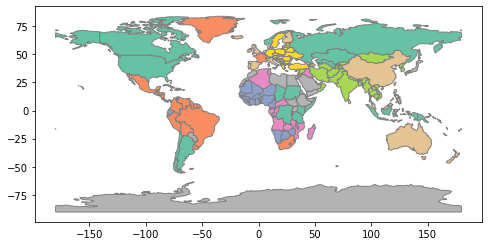

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
#loading GeoDataFrames 


def plot_country_color( axes, country_name, fcolor ):
    '''
    plot each country in specific color with provided axes
    '''
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

    
'''
Access 'flights' data
'''
print('reading data from xlsx files global mobility')
data_gl = pd.read_excel('Global_Transnational_Mobility_dataset_v1_0.xlsx')

print('accessing the data')
print(data_gl.head())

print('make column with flights per each country "source_iso3" in 2014')
#create dataframe from data_gl for data_gl_2014


is_2014 = data_gl['year']==2014
data_2014 = data_gl[is_2014]

#data_gl_2014 = data_gl.iloc[data_gl['year'] == '2014']
print('new dataframe for 2014 is created')
#loop through all elements in iso_a3 

#for index, row in data_2014.iterrows(): 
#    print (row["source_iso3"], row["estimated_trips"])


#Now we plot number of flights on the map using plotCountryPatch function
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    
'''
Now we plot the whole world
'''
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Europe'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

'''
Now we color the world with colors per country as number of trips
Warning: some errors due to missing values
'''
# then plot some countries on with color encoded in estimated_trips
for index, row in data_2014.iterrows(): 
    print (row["source_iso3"], row["estimated_trips"])
#    plot_country_color(ax2, row["source_iso3"], row["estimated_trips"])

#plotCountryPatch(ax2, 'Germany', 'red')
#plotCountryPatch(ax2, 'Poland', 'green')

    
'''
Another option is:
Insert additional column 'flights' to the gpd.world dataframe with the number of flights
'''
#idx = 7
#new_col = [7, 8, 9] #number of flights from this country from another dataframe
#world.insert(loc=idx, column='flights', value=new_col)

In [1]:
'''
Now using example file from plotly 
https://plot.ly/python/lines-on-maps/ 
we plot the flights on a map
'''

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

airports = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

flight_paths = []
for i in range(len(df_flight_paths)):
    flight_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ),
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

#fig = go.Figure(data = flight_paths + airports, layout = layout)
#py.iplot(fig, filename = 'd3-flight-paths')

### Airport travel network visualisation

We use openflights open data https://openflights.org/data.html#airline, we are also using the information and ideas from https://www.dataquest.io/blog/python-data-visualization-libraries/ 
<img src="openflights-routedb.png" alt="Drawing" style="width: 200px;"/>


In [5]:
# Analysis of global mobility patterns

# Import the pandas library.
import pandas
import csv
import numpy as np
import pandas



# convert dat file to csv 
# read flash.dat to a list of lists
print('reading airports')
#data_airports = np.fromfile( 'C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat')#, dtype=dt)# np.loadtxt )
#type(data_airports)

#data_airlines = np.fromfile( 'C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airlines.dat')#, dtype=dt)# np.loadtxt )
#type(data_airlines)

# Read in the airports data.
airports = pandas.read_csv("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat", header=None, dtype=str)
airlines = pandas.read_csv("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airlines.dat", header=None, dtype=str)
routes = pandas.read_csv("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/routes.dat", header=None, dtype=str)


airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "nametype"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)
print('reading airlines')
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.routes = pandas.read_csv("routes.csv", header=None, dtype=str)
print('reading routes')
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]
print(type(airports))

airports.head()

print("data loading finished")


reading airports
reading airlines
reading routes
<class 'pandas.core.frame.DataFrame'>
data loading finished


In [6]:
# routes will be our links in the travel network

routes.head()


airline airline_id source source_id dest dest_id codeshare stops equipment
0      2B        410    AER      2965  KZN    2990       NaN     0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN     0       CR2
2      2B        410    ASF      2966  MRV    2962       NaN     0       CR2
3      2B        410    CEK      2968  KZN    2990       NaN     0       CR2
4      2B        410    CEK      2968  OVB    4078       NaN     0       CR2

In [7]:
#to ensure numerical data for routes
routes = routes[routes["airline_id"] != "\\N"]


In [ ]:
# Now we count the length of routes. 
# This can tell us if airlines fly more shorter routes, or more longer ones. 

import math
import matplotlib.pyplot as plt

import seaborn

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return km

# function copied from https://www.dataquest.io/blog/python-data-visualization-libraries/

def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist


# now we apply this function to routes dataframe
route_lengths = routes.apply(calc_dist, axis=1)



# now we are plotting the histogram 
plt.hist(route_lengths, bins=20)
plt.xlabel('Distance')
plt.show()

seaborn.distplot(route_lengths, bins=20)
plt.show()

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


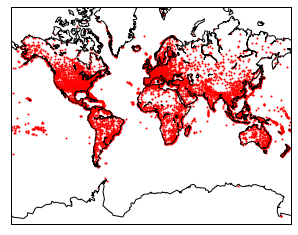

In [21]:
# Now let us plot data on a maps
# First we define x as ids of airports
#name_lengths = airlines["name"].apply(lambda x: len(str(x)))
#plt.scatter(airlines["id"].astype(int), name_lengths)

#data = pandas.DataFrame({"lengths": name_lengths, "ids": airlines["id"].astype(int)})
#seaborn.jointplot(x="ids", y="lengths", data=data)



# using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.

# plot the whole world
#ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


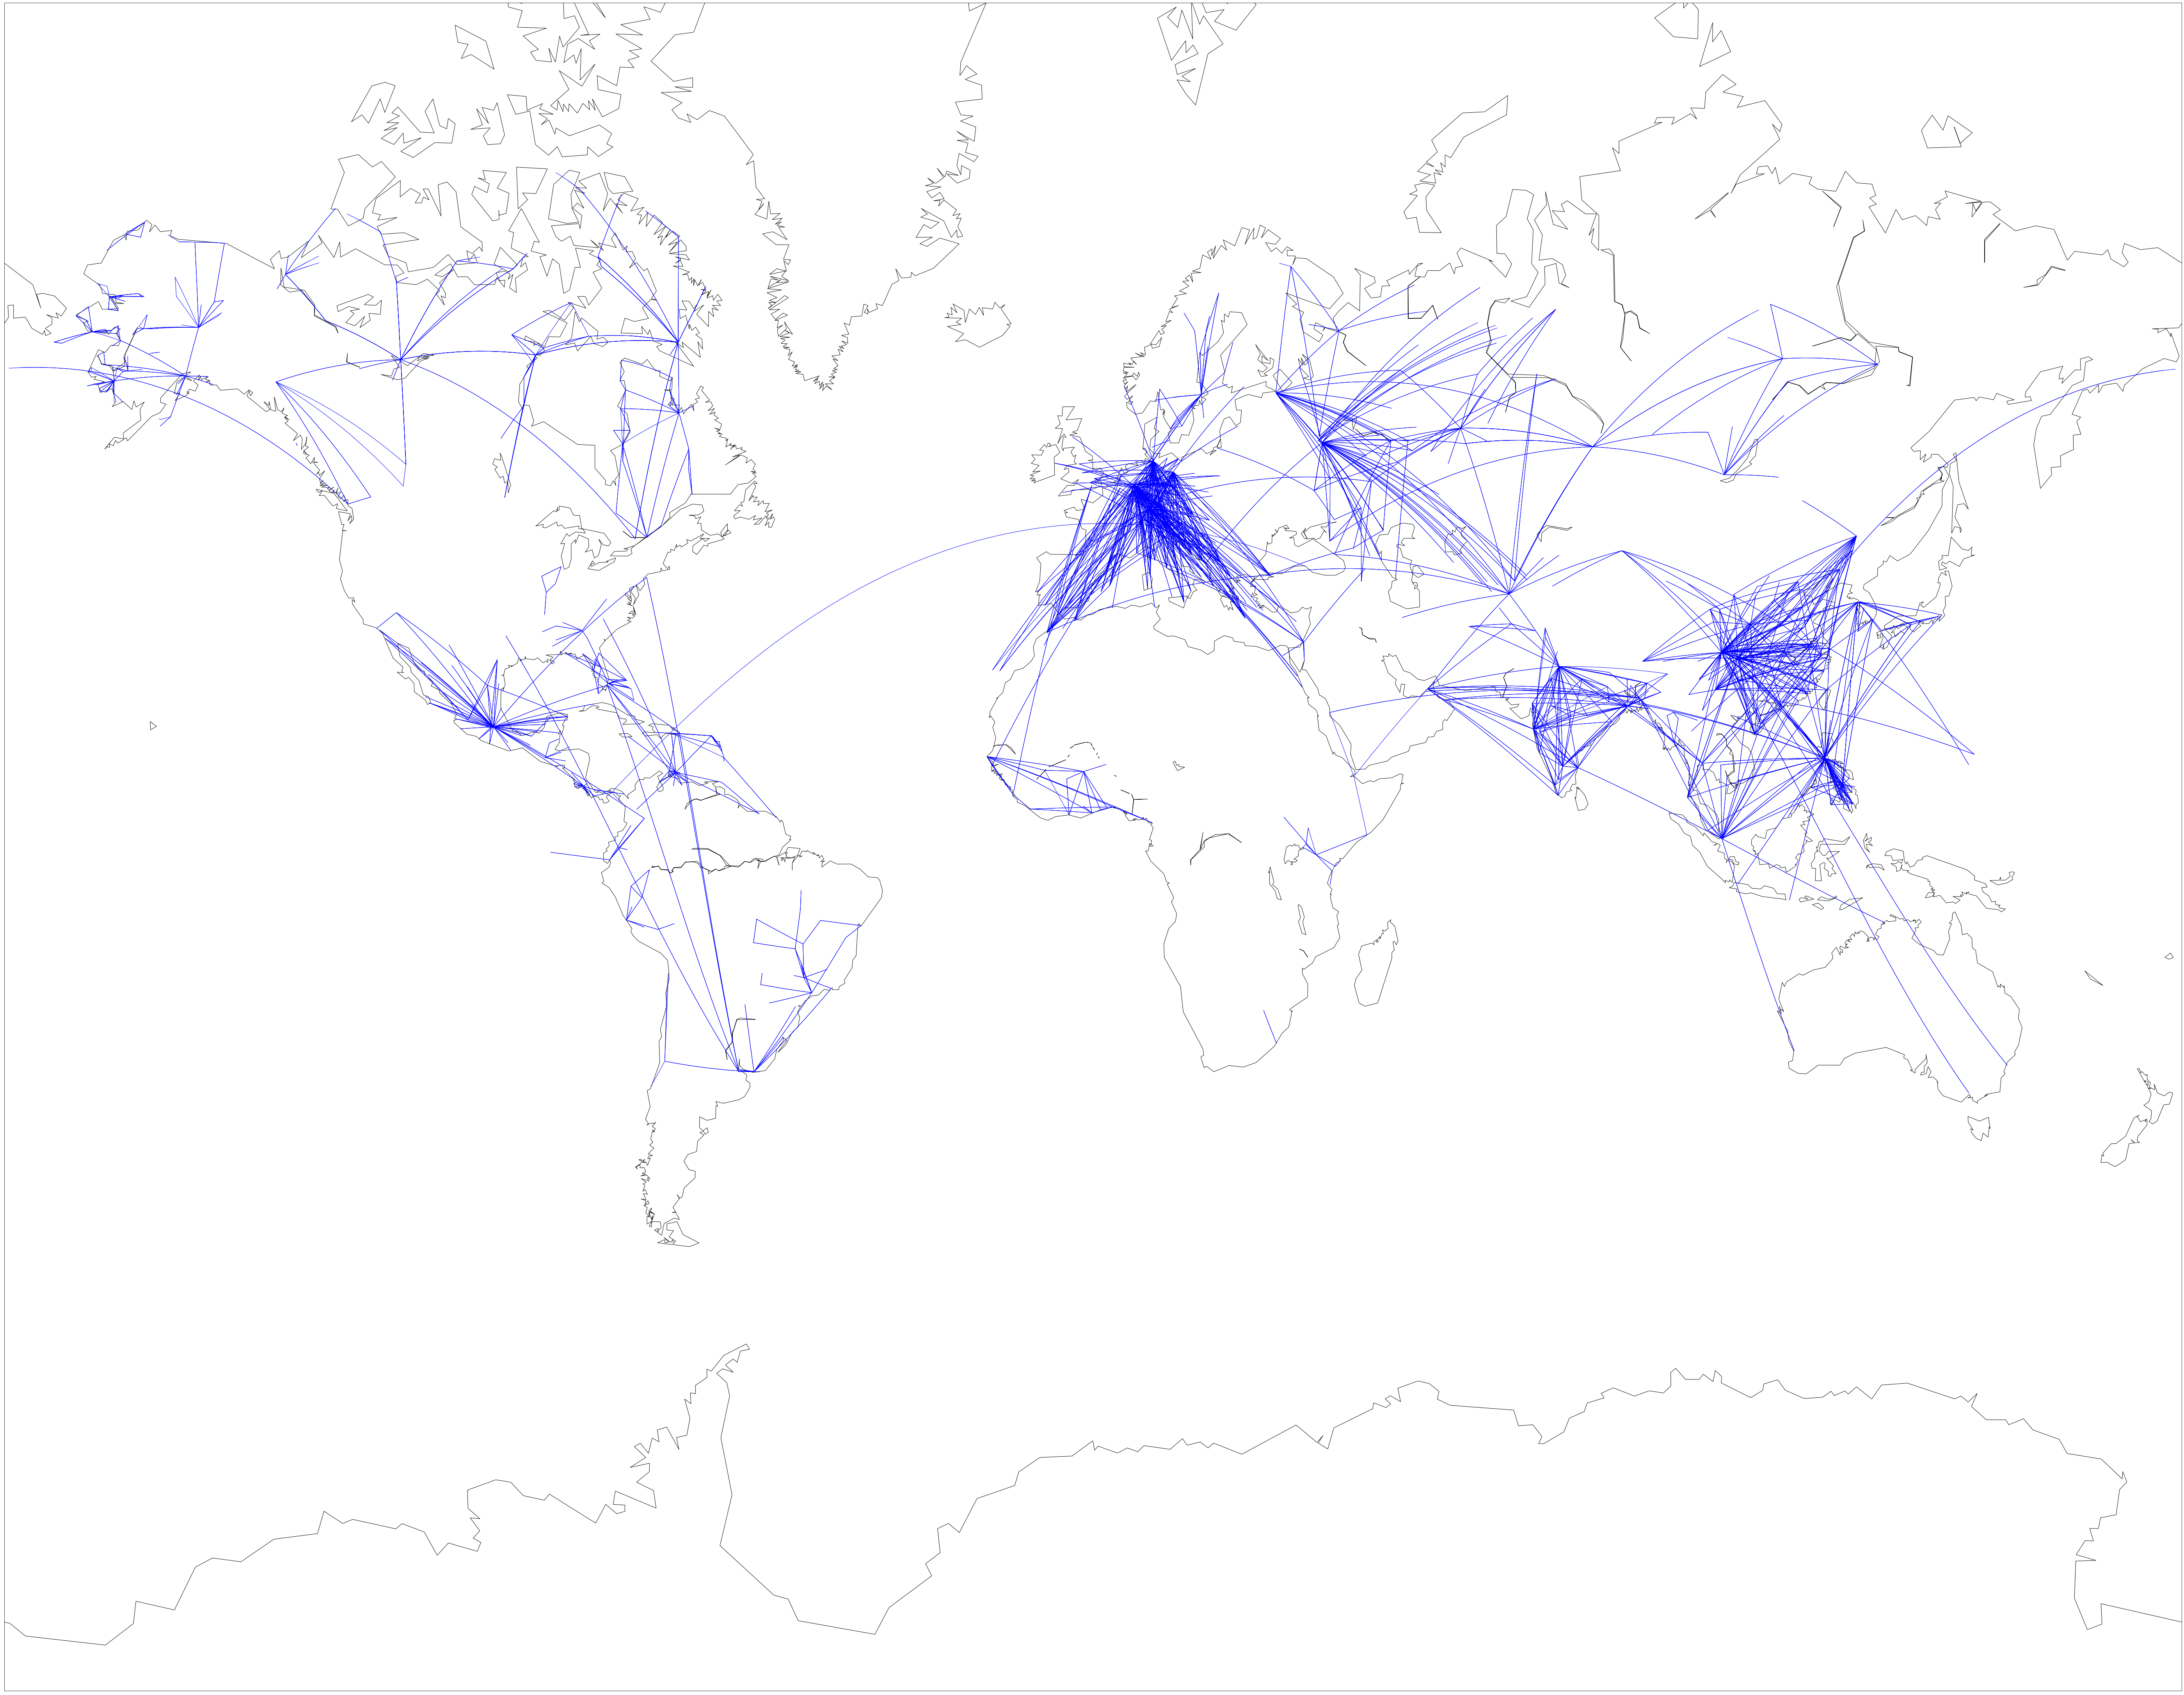

In [5]:
# Make a base map with a mercator projection.
# Draw the coastlines.

from mpl_toolkits.basemap import Basemap


fig, ax = plt.subplots(figsize=(100, 100))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
# Iterate through the first 3000 rows.
for name, row in routes[:3000].iterrows():
    try:
        # Get the source and dest airports.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Don't draw overly long routes.
        # Or draw if we put it as 1000 !!!!! 
        
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 2000:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
# Show the map.
#plt.figure(figsize=(50,50))    
    
plt.show()



We can also plot map using folium map as we did here 
https://github.com/Liyubov/mobility_analysis/blob/master/Analysis%20of%20human%20mobility%20trajectories%20%23%20open%20humans%20data.ipynb


In [24]:
import folium

airports_map = folium.Map(location=[30, 0], zoom_start=2)
# Draw markers on the map.


We can also do the map visualisaton with another library, altair from Python :)

In [32]:
import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


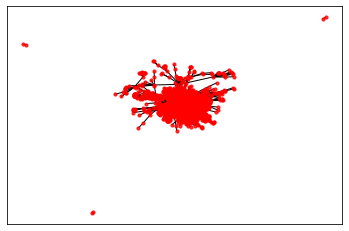

In [6]:
# Import networkx and initialize the graph.
import networkx as nx


# Initialize the weights dictionary.
weights = {}
# Keep track of keys that have been added once -- we only want edges with a weight of more than 1 to keep our network size manageable.
added_keys = []
# Iterate through each route.
for name, row in routes.iterrows():
    # Extract the source and dest airport ids.
    source = row["source_id"]
    dest = row["dest_id"]
        # Create a key for the weights dictionary.
    # This corresponds to one edge, and has the start and end of the route.
    key = "{0}_{1}".format(source, dest)
    # If the key is already in weights, increment the weight.
    if key in weights:
        weights[key] += 1
    # If the key is in added keys, initialize the key in the weights dictionary, with a weight of 2.
    elif key in added_keys:
        weights[key] = 2
    # If the key isn't in added_keys yet, append it.
    # This ensures that we aren't adding edges with a weight of 1.
    else:
        added_keys.append(key)

graph_openflights = nx.Graph()
# Keep track of added nodes in this set so we don't add twice.
nodes = set()
# Iterate through each edge.
for k, weight in weights.items():
    try:
        # Split the source and dest ids and convert to integers.
        source, dest = k.split("_")
        source, dest = [int(source), int(dest)]
        # Add the source if it isn't in the nodes.
        if source not in nodes:
            graph_openflights.add_node(source)
        # Add the dest if it isn't in the nodes.
        if dest not in nodes:
            graph_openflights.add_node(dest)
        # Add both source and dest to the nodes set.
        # Sets don't allow duplicates.
        nodes.add(source)
        nodes.add(dest)
                # Add the edge to the graph.
        graph_openflights.add_edge(source, dest, weight=weight)
    except (ValueError, IndexError):
        passpos=nx.spring_layout(graph_openflights)

# Draw the nodes and edges.

pos=nx.spring_layout(graph_openflights)
nx.draw_networkx_nodes(graph_openflights, pos, node_color='red', node_size=10, alpha=0.8)
nx.draw_networkx_edges(graph_openflights,pos, width=1.0,alpha=1) #nx.draw_networkx_edges(graph,pos,width=1.0,alpha=1)
# Show the plot.
plt.show()

### Compare different mobility data 

We can look at mobility patterns of Erasmus exchange to understand 
to which extend this data is embedded in the global mobility data from open flights.

We thank Erasmus mobility statistics for providing open information about it 
https://data.europa.eu/euodp/en/data/dataset/erasmus-mobility-statistics-2013-14 


In [13]:
import pandas
data_erasmus = pandas.read_excel('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/mobility_dataERASMUS/Student_Mobility_2013-14.xlsx', header=None, dtype=str)


In [27]:
type(data_erasmus)

pandas.core.frame.DataFrame

### Visualising data

Now we want to plot subnetwork of flights for scientific and student exchange on the same map 
as we did with openflights open data.

In [14]:
print('reading Erasmus data...')
data_erasmus.columns = ["Action", "CallYear", "ProjectNumber", "MobiilityID", "SendingCountry", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)



reading Erasmus data...


In [33]:
#how data looks like 

data_erasmus.head()

Action  CallYear           ProjectNumber     MobiilityID  SendingCountry  \
0  Action  CallYear           ProjectNumber     MobiilityID  SendingCountry   
1   ERA02      2013  2013-1-AT1-ERA02-09538  WI0110-ER-1314              AT   
2   ERA02      2013  2013-1-AT1-ERA02-09538  WI0170-ER-1314              AT   
3   ERA02      2013  2013-1-AT1-ERA02-09538  WI0184-ER-1314              AT   
4   ERA02      2013  2013-1-AT1-ERA02-09538  WI0842-ER-1314              AT   

   ReceivingCountry  MobilityType  SpecialNeeds  SubjectAreaCode  \
0  ReceivingCountry  MobilityType  SpecialNeeds  SubjectAreaCode   
1                NO       Mob-SMS             0              140   
2                NO       Mob-SMS             0              140   
3                NO       Mob-SMS             0              140   
4                IE       Mob-SMS             0              140   

                                     SubjectAreaName         ...          \
0                                    SubjectAreaName         ...           
1  Teacher training and education science (broad ...         ...           
2  Teacher training and education science (broad ...         ...           
3  Teacher training and education science (broad ...         ...           
4  Teacher training and education science (broad ...         ...           

   ParticipantID  ParticipantGender  ParticipantType  Language  \
0  ParticipantID  ParticipantGender  ParticipantType  Language   
1          91781                  F         Students        EN   
2          91857                  F         Students        EN   
3          91773                  M         Students        EN   
4          91988                  F         Students        EN   

   SendingPartnerErasmusID                          SendingPArtnerName  \
0  SendingPartnerErasmusID                          SendingPartnerName   
1               A  BADEN01  PÃ¤dagogische Hochschule NiederÃ¶sterreich   
2               A  BADEN01  PÃ¤dagogische Hochschule NiederÃ¶sterreich   
3               A  BADEN01  PÃ¤dagogische Hochschule NiederÃ¶sterreich   
4               A  BADEN01  PÃ¤dagogische Hochschule NiederÃ¶sterreich   

   HostingPartnerErasmusID                 HostingPartnerName  \
0  HostingPartnerErasmusID                 HostingPartnerName   
1             N  PORSGRU01               HOGSKOLEN I TELEMARK   
2             N  PORSGRU01               HOGSKOLEN I TELEMARK   
3             N  PORSGRU01               HOGSKOLEN I TELEMARK   
4              IRLDUBLIN10  MATER DEI INSTITUTE OF EDUCATION    

   HostingPartnerCountry  HostingPartnerCity  
0  HostingPartnerCountry  HostingPartnerCity  
1                     NO           Porsgrunn  
2                     NO           Porsgrunn  
3                     NO           Porsgrunn  
4                     IE              DUBLIN  

[5 rows x 27 columns]

In [ ]:
print('ploting weighted data...')

data_erasmus.columns = ["Action", "CallYear", "ProjectNumber", "MobiilityID", "SendingCountry", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]

# TODO: 
# calculate weight of link via "SendingCountry", "ReceivingCountry" numbers


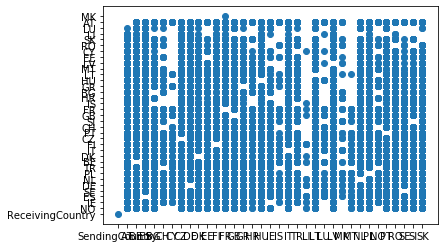

Processed 272498 lines.


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


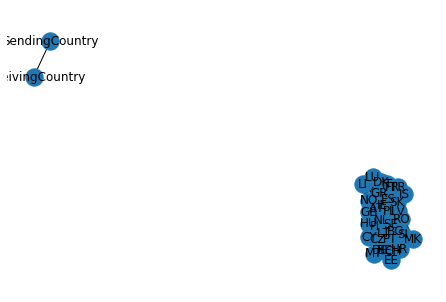

In [15]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt


# Study how much countries send people to each other 

plt.plot(data_erasmus.SendingCountry, data_erasmus.ReceivingCountry, 'o')
#plt.plot(sample_data.column_a, sample_data.column_c)
plt.show()


# Define network of Erasmus connections
# nodes in the network are countries
# links in the travel network are built from data from columns "SendingCountry", "ReceivingCountry" 


G_erasm = nx.Graph() # create an empty graph


line_count = 0
for name, row in data_erasmus.iterrows():
    # Extract the source and dest airport ids.
    type(row[4])
    #source = row["SendingCountry"]
    #dest = row["ReceivingCountry"]
    
    #G.add_node(row["SendingCountry"])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
    line_count += 1
    G_erasm.add_edge(row["SendingCountry"], row["ReceivingCountry"]) #we do not want to include the first row!!
    
print(f'Processed {line_count} lines.')

nx.draw(G_erasm, with_labels = True)
plt.show()

#data_erasmus.SendingCountry.values
#data_erasmus.ReceivingCountry.values

# TODO: to remove bugs from network!!! 




### Visualising networks differently


1. Our networks are quite large, it may make sense to visualise not networks, but raw adjacency matrices themselve. 
2. We can also visualise networks with measures plotted a map using following modules http://ramiro.org/notebook/basemap-choropleth/

First we write several functions for networks comparison and analysis. 



In [10]:
import numpy as np
import seaborn


def measures_for_network(G):
    # -*- coding: utf-8 -*-
    """
    Created on Tue Jul 23 11:33:37 2019
    
    @author: lyubo
    """
    
    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()
    
    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=20)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()    
    
    
    seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=20)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    seaborn.distplot(list(nx.clustering(G).values()), bins=20)
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()
    
    print('calculating global measures')
    
    print('average neighbor degree', nx.average_degree_connectivity(G))
    
    print('average neighbor degree', nx.average_neighbor_degree(G))
    
    print('average clustering')
    avclus = nx.average_clustering(G)
    print(avclus)
    
    
    
    components = nx.connected_components(G)
    print('components', components)
    #[[1, 2, 3], ['spam']]
    
    
    nx.clustering(G)
    #{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}
    
    
    nx.degree(G)
    #Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}



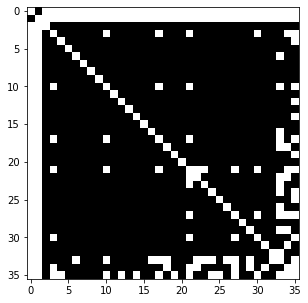

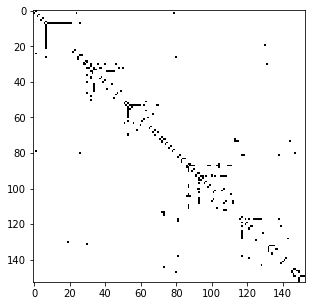

In [12]:
from scipy import io
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np

#here we use properties from http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html 

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

#Adj = nx.adjacency_matrix(G)
#Adj.todense()


'''
Now for comparison we plot matrices from open flights and matrices from Erasmus exchange networks
'''

#G = nx.from_scipy_sparse_matrix(A)
draw_adjacency_matrix(graph_openflights)
draw_adjacency_matrix(G_erasm)


'''
We also can look at network measures 
'''


### Observations 

The first network is very dense, also because we did not percolate it. 
The second one is less dense (threshold for weights of links).  
In order to dig into the network structure, we apply some network measures for these two networks.



drawing measures for graph


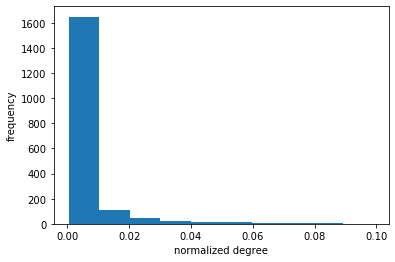

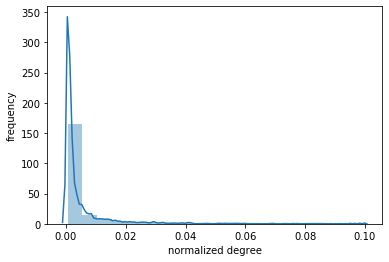

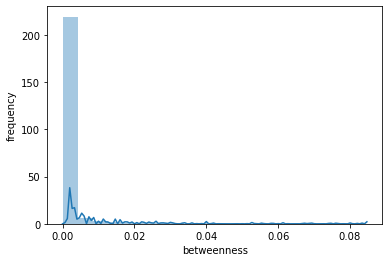

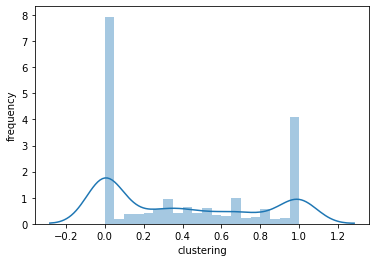

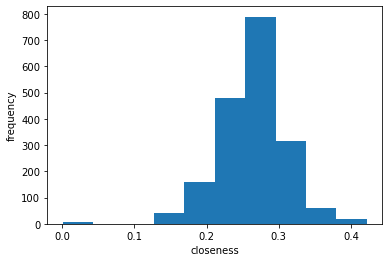

calculating global measures
average neighbor degree {6: 53.292397660818715, 22: 38.532467532467535, 1: 49.938709677419354, 77: 49.696969696969695, 23: 51.723320158102766, 4: 54.54545454545455, 56: 37.57142857142857, 44: 44.59090909090909, 5: 58.55483870967742, 95: 44.136842105263156, 11: 52.32517482517483, 2: 45.32514450867052, 3: 52.18352059925093, 104: 44.61538461538461, 8: 43.25367647058823, 10: 46.91111111111111, 7: 65.82059800664452, 21: 51.21768707482993, 17: 42.588235294117645, 15: 50.13623188405797, 12: 59.30072463768116, 88: 25.829545454545453, 25: 52.832, 76: 47.5, 55: 37.77454545454545, 129: 43.7906976744186, 38: 35.75, 43: 36.27131782945737, 37: 43.8, 72: 37.44444444444444, 32: 45.125, 30: 46.457142857142856, 51: 47.470588235294116, 105: 41.65714285714286, 26: 50.65384615384615, 48: 49.55, 39: 47.623931623931625, 61: 41.50819672131148, 65: 36.98461538461538, 20: 56.127272727272725, 107: 43.18691588785047, 28: 41.892857142857146, 19: 61.771929824561404, 18: 63.41358024691358

drawing measures for graph


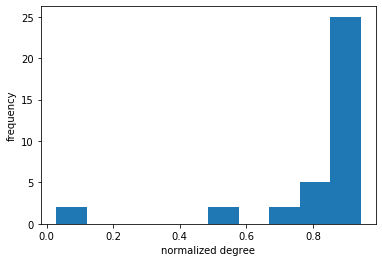

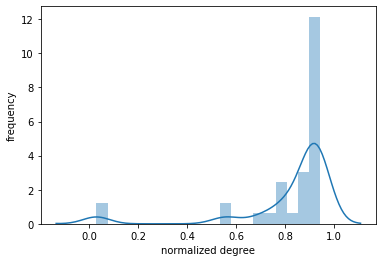

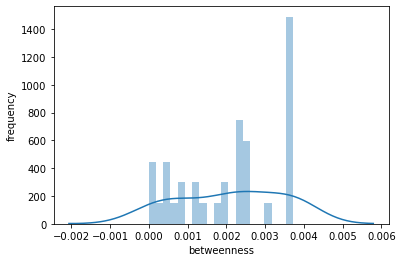

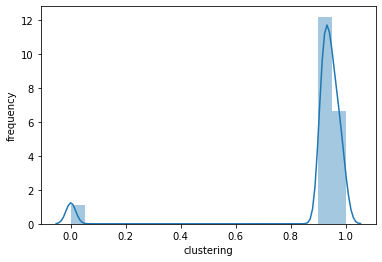

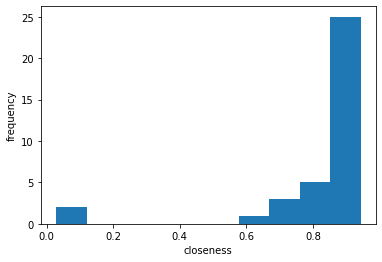

calculating global measures
average neighbor degree {1: 1.0, 33: 30.272727272727273, 27: 31.555555555555557, 32: 30.625, 28: 31.654761904761905, 31: 30.89516129032258, 24: 31.791666666666668, 30: 31.1, 29: 31.20689655172414, 20: 31.35, 25: 31.4, 19: 32.26315789473684}
average neighbor degree {'SendingCountry': 1.0, 'ReceivingCountry': 1.0, 'AT': 30.272727272727273, 'NO': 31.555555555555557, 'IE': 30.65625, 'ES': 30.272727272727273, 'SE': 30.625, 'DE': 30.272727272727273, 'NL': 30.272727272727273, 'PL': 30.272727272727273, 'TR': 31.642857142857142, 'BE': 30.272727272727273, 'DK': 30.65625, 'IT': 30.272727272727273, 'FI': 30.65625, 'CZ': 30.272727272727273, 'PT': 30.625, 'CH': 31.642857142857142, 'SI': 30.838709677419356, 'GB': 30.65625, 'FR': 30.272727272727273, 'IS': 31.791666666666668, 'HR': 31.1, 'BG': 30.870967741935484, 'GR': 31.032258064516128, 'HU': 30.65625, 'LT': 30.625, 'MT': 31.678571428571427, 'LV': 30.272727272727273, 'EE': 30.838709677419356, 'CY': 31.20689655172414, 'RO':

In [16]:
# Here we study

measures_for_network(graph_openflights)
measures_for_network(G_erasm)

In [25]:
### Community analysis 

#community = G_erasm.community_multilevel()

import networkx as nx
from networkx.algorithms import community

communities_generator = community.girvan_newman(graph_openflights)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))


[[1,
  2,
  3,
  4,
  5,
  6,
  16,
  27,
  29,
  30,
  32,
  37,
  40,
  41,
  45,
  49,
  50,
  54,
  55,
  58,
  60,
  69,
  73,
  75,
  78,
  79,
  80,
  87,
  90,
  94,
  100,
  108,
  111,
  117,
  119,
  120,
  121,
  122,
  127,
  132,
  140,
  141,
  144,
  146,
  147,
  148,
  149,
  152,
  153,
  155,
  156,
  160,
  161,
  162,
  164,
  166,
  168,
  169,
  170,
  172,
  173,
  174,
  176,
  178,
  179,
  182,
  183,
  184,
  187,
  188,
  189,
  192,
  193,
  196,
  202,
  209,
  210,
  220,
  221,
  230,
  231,
  235,
  245,
  246,
  248,
  249,
  252,
  253,
  260,
  273,
  275,
  280,
  286,
  287,
  293,
  295,
  298,
  299,
  302,
  304,
  309,
  337,
  338,
  340,
  342,
  344,
  345,
  346,
  347,
  348,
  349,
  350,
  351,
  352,
  353,
  371,
  373,
  382,
  410,
  415,
  416,
  421,
  428,
  430,
  432,
  433,
  435,
  438,
  442,
  446,
  453,
  455,
  458,
  460,
  462,
  465,
  467,
  469,
  478,
  481,
  488,
  490,
  491,
  492,
  494,
  495,
  498,
  499,
